Credit Score Analysis - Jupyter Notebook

Importing essential libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import ast
import numpy as np

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, ttest_ind

from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.tools import add_constant

Importing data and storing in a dataframe

In [2]:
data = pd.read_csv('credit-score-classification-cleaned-dataset/credit_score_cleaned_train.csv')
data.head()

id customer_id     month           name  age          ssn occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   annual_income  monthly_inhand_salary  total_emi_per_month  ...  \
0       19114.12              1824.8434            49.574947  ...   
1       19114.12              1824.8434            49.574947  ...   
2       19114.12              1824.8434            49.574947  ...   
3       19114.12              1824.8434            49.574947  ...   
4       19114.12              1824.8434            49.574947  ...   

   num_credit_inquiries  credit_mix  outstanding_debt  \
0                     4        Good            809.98   
1                     4        Good            809.98   
2                     4        Good            809.98   
3                     4        Good            809.98   
4                     4        Good            809.98   

   credit_utilization_ratio credit_history_age  payment_of_min_amount  \
0                 26.822620                265                     No   
1                 31.944960                266                     No   
2                 28.609352                267                     No   
3                 31.377861                268                     No   
4                 24.797346                269                     No   

   amount_invested_monthly                 payment_behaviour  monthly_balance  \
0                80.415300   High_spent_Small_value_payments        312.49408   
1               118.280220    Low_spent_Large_value_payments        284.62915   
2                81.699524   Low_spent_Medium_value_payments        331.20987   
3               199.458070    Low_spent_Small_value_payments        223.45131   
4                41.420155  High_spent_Medium_value_payments        341.48923   

  credit_score  
0            2  
1            2  
2            2  
3            2  
4            2  

[5 rows x 28 columns]

Exploratory Data Analysis

Looking at the type of each attribute in the dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

Checking for null values

In [4]:
nullCounts = data.isnull().sum()
print(nullCounts)

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64


Checking for duplicates

In [5]:
duplicateRows = data[data.duplicated()]
print(f"Number of duplicate rows: {duplicateRows.shape[0]}")

Number of duplicate rows: 0


Examining the mean and standard deviations of each numerical attribute to get an idea of their distributions

In [6]:
data.describe().T

count          mean           std         min  \
age                       100000.0     33.309240     10.764996    14.00000   
annual_income             100000.0  50505.123439  38299.422075  7005.93000   
monthly_inhand_salary     100000.0   4198.771620   3187.494355   303.64542   
total_emi_per_month       100000.0    107.043617    130.035096     0.00000   
num_bank_accounts         100000.0      5.368800      2.593279     0.00000   
num_credit_card           100000.0      5.533640      2.067073     0.00000   
interest_rate             100000.0     14.532080      8.741330     1.00000   
num_of_loan               100000.0      3.532880      2.446356     0.00000   
delay_from_due_date       100000.0     21.068780     14.860104    -5.00000   
num_of_delayed_payment    100000.0     13.334050      6.271409     0.00000   
changed_credit_limit      100000.0     10.389303      6.789784    -6.49000   
num_credit_inquiries      100000.0      5.772820      3.861137     0.00000   
outstanding_debt          100000.0   1426.220376   1155.129026     0.23000   
credit_utilization_ratio  100000.0     32.285173      5.116875    20.00000   
credit_history_age        100000.0    221.206880     99.681112     1.00000   
amount_invested_monthly   100000.0    637.633413   2043.334171     0.00000   
monthly_balance           100000.0    403.120320    214.014558     0.00776   
credit_score              100000.0      0.888300      0.675120     0.00000   

                                   25%           50%           75%  \
age                          24.000000     33.000000     42.000000   
annual_income             19342.972500  36999.705000  71683.470000   
monthly_inhand_salary      1626.761700   3096.378400   5961.745000   
total_emi_per_month          29.197023     66.403020    146.827450   
num_bank_accounts             3.000000      5.000000      7.000000   
num_credit_card               4.000000      5.000000      7.000000   
interest_rate                 7.000000     13.000000     20.000000   
num_of_loan                   2.000000      3.000000      5.000000   
delay_from_due_date          10.000000     18.000000     28.000000   
num_of_delayed_payment        9.000000     14.000000     18.000000   
changed_credit_limit          5.320000      9.400000     14.860000   
num_credit_inquiries          3.000000      5.000000      8.000000   
outstanding_debt            566.072500   1166.155000   1945.962500   
credit_utilization_ratio     28.052567     32.305783     36.496664   
credit_history_age          144.000000    219.000000    302.000000   
amount_invested_monthly      74.593977    135.952230    266.178185   
monthly_balance             270.189028    337.114475    471.570645   
credit_score                  0.000000      1.000000      1.000000   

                                  max  
age                           56.0000  
annual_income             179987.2800  
monthly_inhand_salary      15204.6340  
total_emi_per_month         3776.0000  
num_bank_accounts             11.0000  
num_credit_card               11.0000  
interest_rate                 34.0000  
num_of_loan                    9.0000  
delay_from_due_date           67.0000  
num_of_delayed_payment        28.0000  
changed_credit_limit          36.9700  
num_credit_inquiries          17.0000  
outstanding_debt            4998.0700  
credit_utilization_ratio      50.0000  
credit_history_age           404.0000  
amount_invested_monthly    10000.0000  
monthly_balance             1602.0405  
credit_score                   2.0000

Examining the number of unique catgeories in each categorical attribute

In [7]:
data.describe(include="object").T

count  unique                             top   freq
id                     100000  100000                          0x1602      1
customer_id            100000   12500                       CUS_0xd40      8
month                  100000       8                         January  12500
name                   100000   10139                          Langep     48
ssn                    100000   12500                     821-00-0265      8
occupation             100000      15                          Lawyer   7096
type_of_loan           100000    6261                     ['No Loan']  11408
credit_mix             100000       3                        Standard  45848
payment_of_min_amount  100000       2                             Yes  59432
payment_behaviour      100000       6  Low_spent_Small_value_payments  27588

Dropping id, name and ssn columns since they are not revlevant to this analysis

In [8]:
columnsToDrop = ['id', 'name', 'ssn']
data = data.drop(columns=columnsToDrop)

Dropping customers that have ages lower than 18 since thier credit scores are reliant on their parents which is a corner case that this analysis is not interested in

In [9]:
filteredData = data[data['age'] < 18]
numCustomersToRemove = filteredData['customer_id'].nunique()
print(numCustomersToRemove)

788


In [10]:
customersToRemove = filteredData['customer_id'].unique()
data = data[~data['customer_id'].isin(customersToRemove)]
data['customer_id'].nunique()

11712

Dropping customers that have no bank accounts but have a monthly balance greater than 0 which is not possible

In [11]:
filteredData = data[(data['num_bank_accounts'] == 0) & (data['monthly_balance'] > 0)]
numCustomersToRemove = filteredData['customer_id'].nunique()

print(numCustomersToRemove)

563


In [12]:
customersToRemove = filteredData['customer_id'].unique()
data = data[~data['customer_id'].isin(customersToRemove)]
data['customer_id'].nunique()

11149

Checking if credit_history_age is lesser than the number of years from age 18 to current age of the customer

In [13]:
filteredData = data[(data['credit_history_age']//12) > (data['age']-18)]
print(filteredData[['age', 'credit_history_age']])
numCustomersToRemove = filteredData['customer_id'].nunique()
print(numCustomersToRemove)

       age  credit_history_age
0       23                 265
1       23                 266
2       23                 267
3       23                 268
4       23                 269
...    ...                 ...
99995   25                 378
99996   25                 379
99997   25                 380
99998   25                 381
99999   25                 382

[46537 rows x 2 columns]
5935


Credit_history_age has majority erroneous data since most of the customers have a credit history age greater than the duration from age 18 to their current age which is not possible hence this column is dropped

In [14]:
data = data.drop('credit_history_age', axis=1)
data.head()

customer_id     month  age occupation  annual_income  monthly_inhand_salary  \
0   CUS_0xd40   January   23  Scientist       19114.12              1824.8434   
1   CUS_0xd40  February   23  Scientist       19114.12              1824.8434   
2   CUS_0xd40     March   23  Scientist       19114.12              1824.8434   
3   CUS_0xd40     April   23  Scientist       19114.12              1824.8434   
4   CUS_0xd40       May   23  Scientist       19114.12              1824.8434   

   total_emi_per_month  num_bank_accounts  num_credit_card  interest_rate  \
0            49.574947                  3                4              3   
1            49.574947                  3                4              3   
2            49.574947                  3                4              3   
3            49.574947                  3                4              3   
4            49.574947                  3                4              3   

   ...  changed_credit_limit num_credit_inquiries  credit_mix  \
0  ...                 11.27                    4        Good   
1  ...                 11.27                    4        Good   
2  ...                 11.27                    4        Good   
3  ...                  6.27                    4        Good   
4  ...                 11.27                    4        Good   

   outstanding_debt  credit_utilization_ratio  payment_of_min_amount  \
0            809.98                 26.822620                     No   
1            809.98                 31.944960                     No   
2            809.98                 28.609352                     No   
3            809.98                 31.377861                     No   
4            809.98                 24.797346                     No   

  amount_invested_monthly                 payment_behaviour  monthly_balance  \
0               80.415300   High_spent_Small_value_payments        312.49408   
1              118.280220    Low_spent_Large_value_payments        284.62915   
2               81.699524   Low_spent_Medium_value_payments        331.20987   
3              199.458070    Low_spent_Small_value_payments        223.45131   
4               41.420155  High_spent_Medium_value_payments        341.48923   

  credit_score  
0            2  
1            2  
2            2  
3            2  
4            2  

[5 rows x 24 columns]

Label encoding credit_mix to numerical data and storing it in a new column: CreditMixNum. (Bad -> 0, Standard -> 1, Good -> 2)

In [15]:
uniqueCreditMix = data['credit_mix'].unique()
print("Unique credit mix in the dataset:", sorted(uniqueCreditMix))

Unique credit mix in the dataset: ['Bad', 'Good', 'Standard']


In [16]:
creditMixMapping = {'Bad': 0, 'Standard': 1, 'Good': 2}
data['creditMixNum'] = data['credit_mix'].map(creditMixMapping)

data[['credit_mix', 'creditMixNum']].head()

credit_mix  creditMixNum
0       Good             2
1       Good             2
2       Good             2
3       Good             2
4       Good             2

Label encoding payment_of_min_amount to numerical data and storing it in a new colum called paymentMinAmountNum (No -> 0, Yes -> 1). 0 denotes a customer who does not pay just the minimum amount and instead pays more, whereas 1 denotes a customer who pays just the minimum amount

In [17]:
uniquePaymentMinAmt = data['payment_of_min_amount'].unique()
print("Unique payment of min amount in the dataset:", sorted(uniquePaymentMinAmt))

Unique payment of min amount in the dataset: ['No', 'Yes']


In [18]:
paymentMinAmtMapping = {'No': 0, 'Yes': 1}
data['paymentMinAmountNum'] = data['payment_of_min_amount'].map(paymentMinAmtMapping)

data[['payment_of_min_amount', 'paymentMinAmountNum']].head()

payment_of_min_amount  paymentMinAmountNum
0                    No                    0
1                    No                    0
2                    No                    0
3                    No                    0
4                    No                    0

Converting type_of_loan entries from string to list of strings to make it usable

In [19]:
data['type_of_loan'] = data['type_of_loan'].apply(ast.literal_eval)

Checking if num_of_loans matches with the length of type of loans taken

In [20]:
def countValidLoans(loanList):
    count = 0
    for loan in loanList:
        if loan != 'No Loan':
            count += 1
    return count

mismatchedRows = data[data['num_of_loan'] != data['type_of_loan'].apply(countValidLoans)]

print(f"Number of rows with mismatched loan counts: {len(mismatchedRows)}")

Number of rows with mismatched loan counts: 0


Storing the unique loan types in a list

In [21]:
uniqueLoanTypes = set()

for loans in data['type_of_loan']:
    for loan in loans:  
        uniqueLoanTypes.add(loan) 

loanTypes = list(uniqueLoanTypes)
print(loanTypes)

['No Loan', 'Credit-Builder Loan', 'Personal Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan', 'Debt Consolidation Loan', 'Student Loan', 'Not Specified']


Getting count of the different types of loan in each credit score

In [22]:
loanDict = {}

for creditScore in data['credit_score'].unique():
    creditScoreData = data[data['credit_score'] == creditScore]
    loanCounts = {}
    for loans in creditScoreData['type_of_loan']:
        for loan in loans:
            if loan in loanCounts:
                loanCounts[loan] += 1
            else:
                loanCounts[loan] = 1
    loanDict[creditScore] = loanCounts

print(loanDict)

{2: {'Auto Loan': 3566, 'Credit-Builder Loan': 4101, 'Personal Loan': 3659, 'Home Equity Loan': 3802, 'Not Specified': 3993, 'No Loan': 3013, 'Debt Consolidation Loan': 3574, 'Payday Loan': 3897, 'Mortgage Loan': 3845, 'Student Loan': 3888}, 1: {'Auto Loan': 16927, 'Credit-Builder Loan': 18131, 'Personal Loan': 17644, 'Home Equity Loan': 17504, 'Not Specified': 17529, 'No Loan': 6137, 'Student Loan': 16822, 'Debt Consolidation Loan': 17522, 'Payday Loan': 17962, 'Mortgage Loan': 17225}, 0: {'Not Specified': 13374, 'Auto Loan': 13043, 'Student Loan': 13698, 'Personal Loan': 13361, 'Payday Loan': 14101, 'Home Equity Loan': 13286, 'No Loan': 1130, 'Mortgage Loan': 13418, 'Debt Consolidation Loan': 13424, 'Credit-Builder Loan': 13600}}


In [23]:
flattenedData = []

for creditScore, loans in loanDict.items():
    for loan, count in loans.items():
        flattenedData.append({
            'credit_score': creditScore,
            'loan_type': loan,
            'loan_count': count
        })

loanData = pd.DataFrame(flattenedData)
loanData

credit_score                loan_type  loan_count
0              2                Auto Loan        3566
1              2      Credit-Builder Loan        4101
2              2            Personal Loan        3659
3              2         Home Equity Loan        3802
4              2            Not Specified        3993
5              2                  No Loan        3013
6              2  Debt Consolidation Loan        3574
7              2              Payday Loan        3897
8              2            Mortgage Loan        3845
9              2             Student Loan        3888
10             1                Auto Loan       16927
11             1      Credit-Builder Loan       18131
12             1            Personal Loan       17644
13             1         Home Equity Loan       17504
14             1            Not Specified       17529
15             1                  No Loan        6137
16             1             Student Loan       16822
17             1  Debt Consolidation Loan       17522
18             1              Payday Loan       17962
19             1            Mortgage Loan       17225
20             0            Not Specified       13374
21             0                Auto Loan       13043
22             0             Student Loan       13698
23             0            Personal Loan       13361
24             0              Payday Loan       14101
25             0         Home Equity Loan       13286
26             0                  No Loan        1130
27             0            Mortgage Loan       13418
28             0  Debt Consolidation Loan       13424
29             0      Credit-Builder Loan       13600

Examining the unique credit score values in the target column: credit_score

In [24]:
uniqueScores = data['credit_score'].unique()
print("Unique credit scores in the dataset:", sorted(uniqueScores))

Unique credit scores in the dataset: [0, 1, 2]


There are three possible credit scores classes. 0 which referes to Poor, 1 which referes to Standard and 2 which refers to Good.

Evaluating distribution of Credit Scores

In [25]:
scoreCounts = data['credit_score'].value_counts()
scorePercentages = data['credit_score'].value_counts(normalize=True) * 100
scoreSummary = pd.DataFrame({
    'Count': scoreCounts,
    'Percentage (%)': scorePercentages
})

print("Credit score counts and percentages:\n", scoreSummary.sort_index())

Credit score counts and percentages:
    Count  Percentage (%)
0  25361       28.434164
1  48214       54.056418
2  15617       17.509418


Plotting a pie chart illustrating the distribution of credit scores in the data. This figure is mentioned in the report

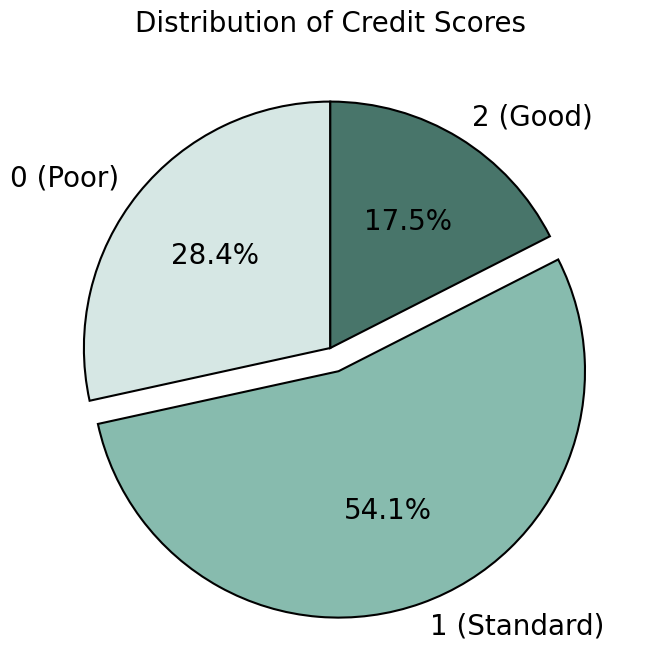

In [26]:
labels = ['0 (Poor)', '1 (Standard)', '2 (Good)']
colours = ['#d6e7e4', '#87bbae', '#48756a']
explode = (0, 0.1, 0)
sortedScoreCounts = scoreCounts.sort_index()

plt.figure(figsize=(8, 8))

plt.pie(sortedScoreCounts, 
        autopct=lambda pct: f'{pct:.1f}%', 
        labels=labels,
        startangle=90, 
        colors=colours, 
        textprops={'fontsize': 20},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
        explode=explode)

plt.title('Distribution of Credit Scores', fontsize=20)
plt.savefig('graphs/credit_score_distribution.png', dpi=300, transparent=True)
plt.show()

Data is slightly unbalanced with the majority class being Standard (1) with 54.1%, followed by Poor (0) with 28.4% and then Good (2) with 17.5%.

Count of unique customers

In [27]:
uniqueCustomers = data['customer_id'].nunique()
print(f"Number of unique customer IDs: {uniqueCustomers}")

Number of unique customer IDs: 11149


After initial data preparation, the dataset contains data on 11149 customers.

Looking at the unique month values

In [28]:
uniqueMonths = data['month'].unique()
print("Unique months in the dataset:", uniqueMonths)

Unique months in the dataset: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']


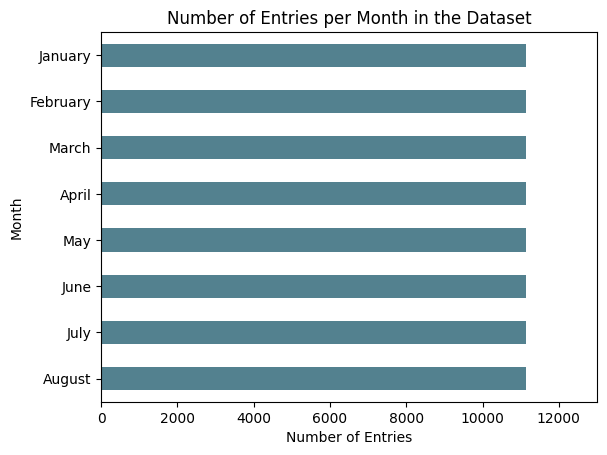

In [29]:
monthCounts = data['month'].value_counts()

sns.barplot(
    x=monthCounts.values, 
    y=monthCounts.index, 
    color='#498699',
    width=0.5)

plt.xlim(0, 13000)
plt.xlabel("Number of Entries")
plt.ylabel("Month")
plt.title("Number of Entries per Month in the Dataset")
plt.show()

There is data for each customer over 8 months from January to August.

Examining the distribution of credit scores in each month

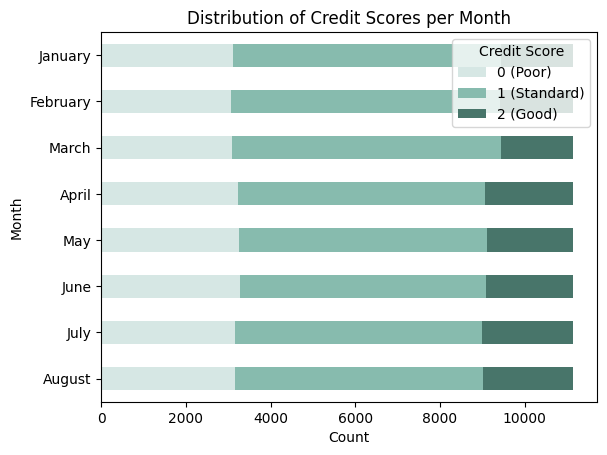

In [30]:
monthOrder = ['August', 'July', 'June', 'May', 'April', 'March', 'February', 'January']
data['orderedMonth'] = pd.Categorical(data['month'], categories=monthOrder)

monthScoreDistribution = data.groupby(['orderedMonth', 'credit_score']).size().unstack()

monthScoreDistribution.plot(kind='barh', stacked=True, color=['#d6e7e4', '#87bbae', '#48756a'])
plt.title("Distribution of Credit Scores per Month")
plt.xlabel("Count")
plt.ylabel("Month")
plt.legend(labels=["0 (Poor)", "1 (Standard)", "2 (Good)"], title="Credit Score", loc="upper right")
plt.show()

The distribution of credit scores is similar for every month. Standard has the highest percentage of credit scores across every month followed by Poor and then Good.

Checking if the customer credit score remains same or varies across the 8 months (January-August)

In [31]:
creditScoreVariability = data.groupby('customer_id')['credit_score'].nunique()
varyingCreditScores = creditScoreVariability[creditScoreVariability > 1]

print(f"Number of customers with varying credit scores: {len(varyingCreditScores)}")

Number of customers with varying credit scores: 6424


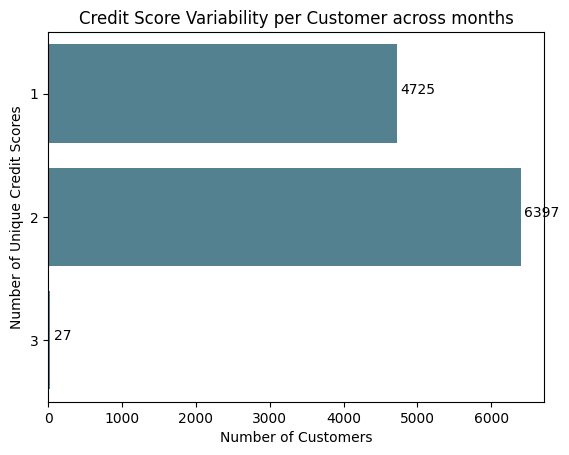

In [32]:
variabilityCounts = creditScoreVariability.value_counts().sort_index()

sns.barplot(
    x=variabilityCounts.values,    
    y=variabilityCounts.index.astype(str),
    color='#498699')

for index, value in enumerate(variabilityCounts.values):
    plt.text(value + 50, index, str(value))
    
plt.title("Credit Score Variability per Customer across months")
plt.ylabel("Number of Unique Credit Scores")
plt.xlabel("Number of Customers")
plt.show()

4725 customers maintain same the credit score across the 8 months whereas 6397 customers go from one score to another and 27 customers change across all three credit scores.

Univariate Analysis of Numerical Variables. Analyzing their distributions using boxplots and histograms

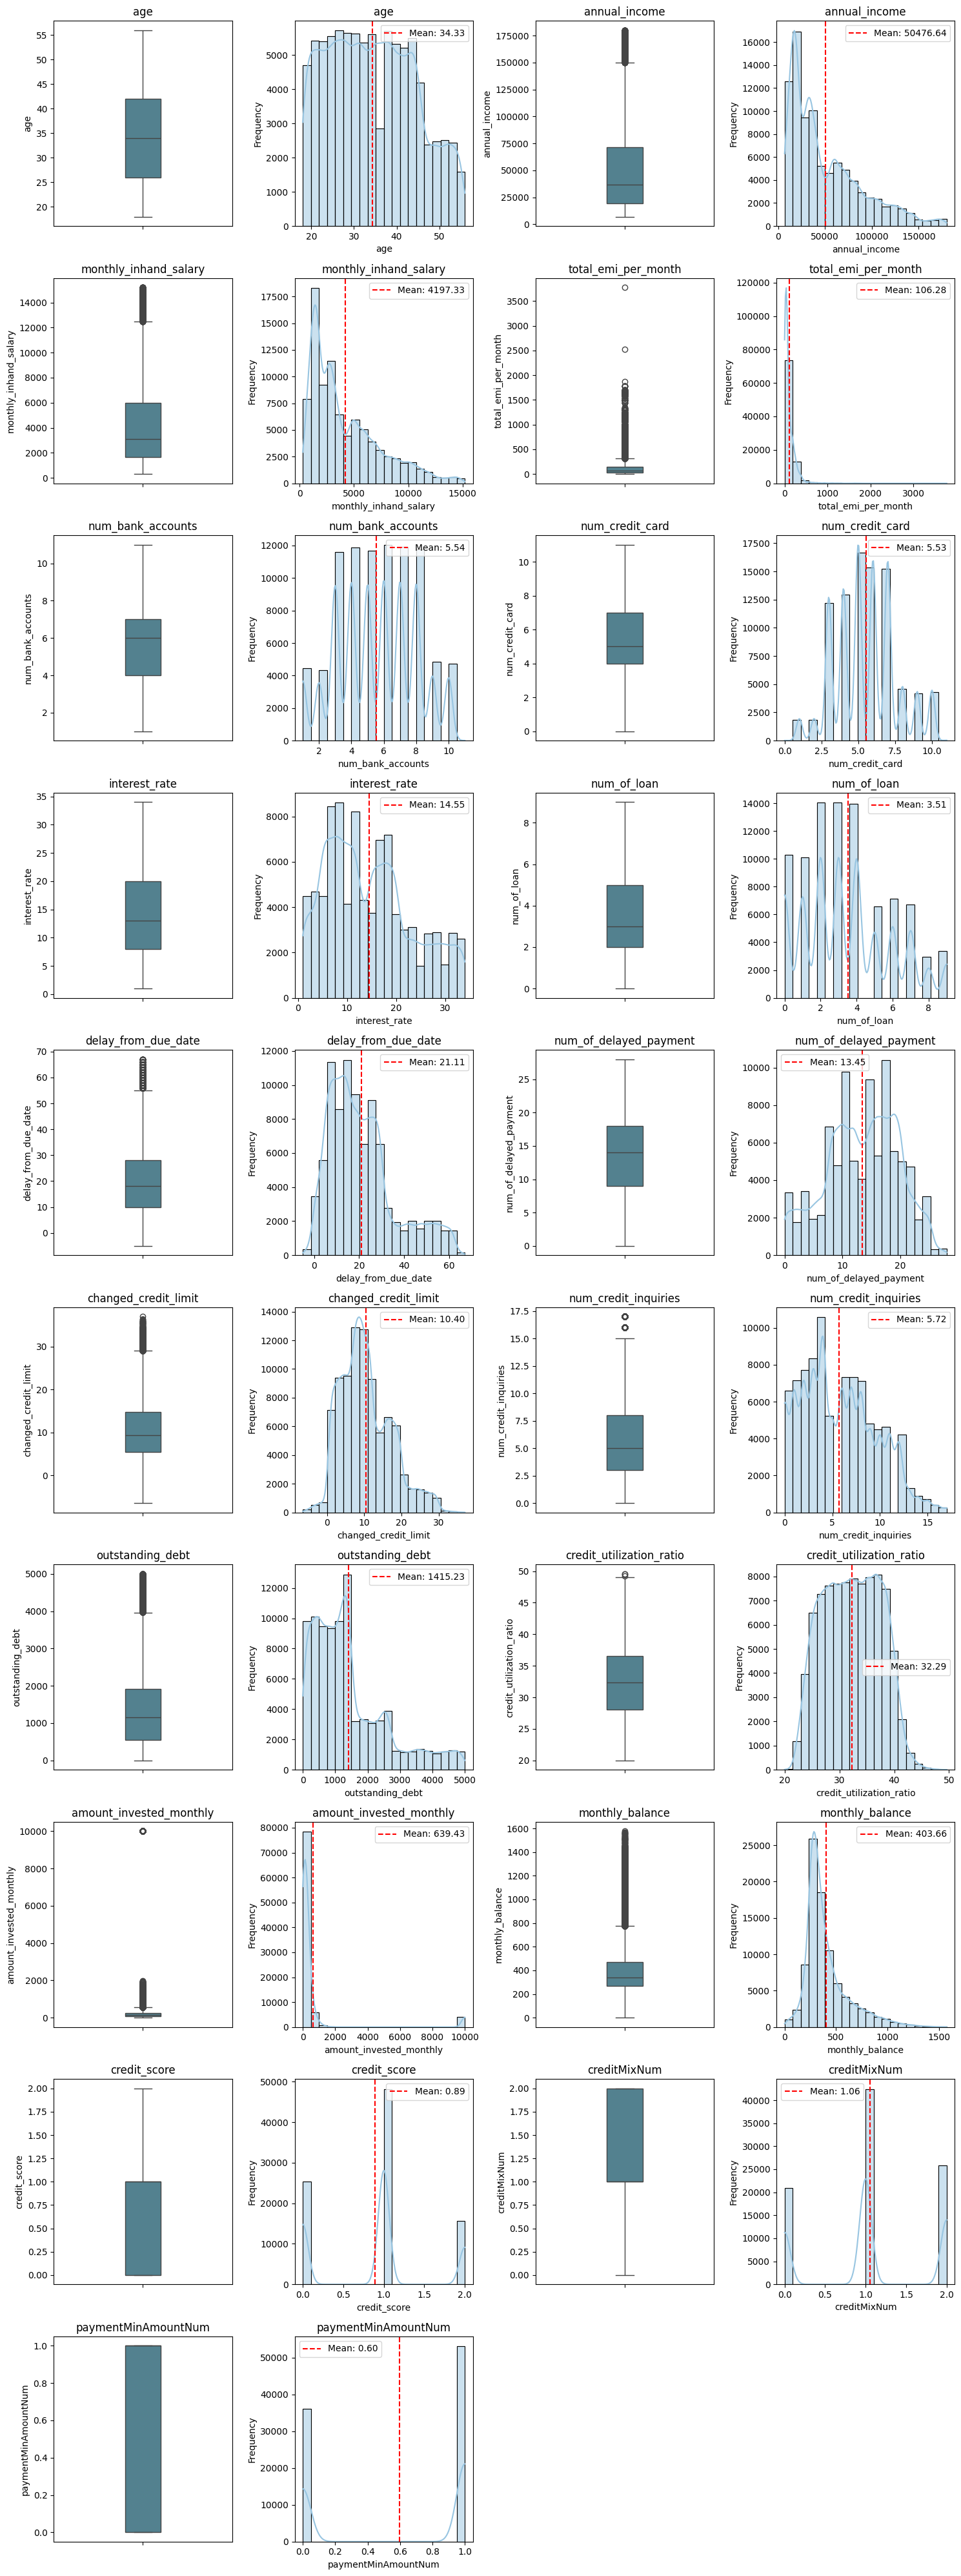

In [33]:
numericColumns = data.select_dtypes(include='number').columns
numPlots = len(numericColumns)
rows = (numPlots // 2) + 1
cols = 4  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numericColumns):
  
    sns.boxplot(data=data, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(col)
    axes[2 * i].set_ylabel(col)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=20)
    mean = data[col].mean()
    axes[2 * i + 1].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[2 * i + 1].legend()
    axes[2 * i + 1].set_title(col)
    axes[2 * i + 1].set_xlabel(col)
    axes[2 * i + 1].set_ylabel('Frequency')


for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Variables such as age, num_bank_accounts, num_credit_card, num_of_delayed_payments, changed_credit_limit and credit_utlization_ratio are somewhat normally distributed with their means close to the centre. Interest_rate, num_of_loans, delay_from_due_date, num_credit_inquiries are slightly right-skewed. Variables annual_income, monthly_inhand_salary, total_emi_per_month, outstanding_debt, amount_invested_monthly and monthly_balance are heavily right skewed. Total_emi_per_month and amount_invested_monthly have outliers which will be removed.

Removing outliers from total_emi_per_month and amount_invested_monthly, and plotting them again

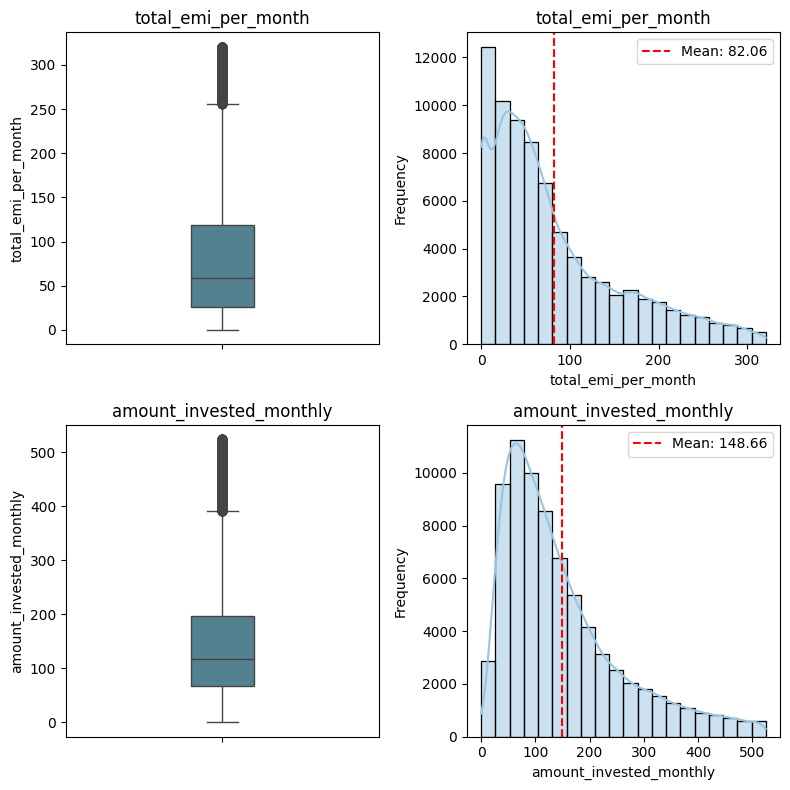

In [34]:
columnsToPlot = ['total_emi_per_month', 'amount_invested_monthly']

for column in columnsToPlot:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    iqr = Q3 - Q1
    lowerBound = Q1 - 1.5 * iqr
    upperBound = Q3 + 1.5 * iqr
    data = data[(data[column] >= lowerBound) & (data[column] <= upperBound)]

rows = 2
cols = 2  
fig, axes = plt.subplots(rows, cols, figsize=(8, rows * 4))
axes = axes.flatten()


for i, col in enumerate(columnsToPlot):
  
    sns.boxplot(data=data, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(col)
    axes[2 * i].set_ylabel(col)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=20)
    mean = data[col].mean()
    axes[2 * i + 1].axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[2 * i + 1].legend()
    axes[2 * i + 1].set_title(col)
    axes[2 * i + 1].set_xlabel(col)
    axes[2 * i + 1].set_ylabel('Frequency')


for j in range(2 * 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Both of them have a right-skewed distribution

In [35]:
uniqueCustomers = data['customer_id'].nunique()
print(f"Number of unique customer IDs: {uniqueCustomers}")

Number of unique customer IDs: 10720


After removing outliers, the dataset contains 10720 customers.

Univariate Analysis of Categorical Variables using barcharts


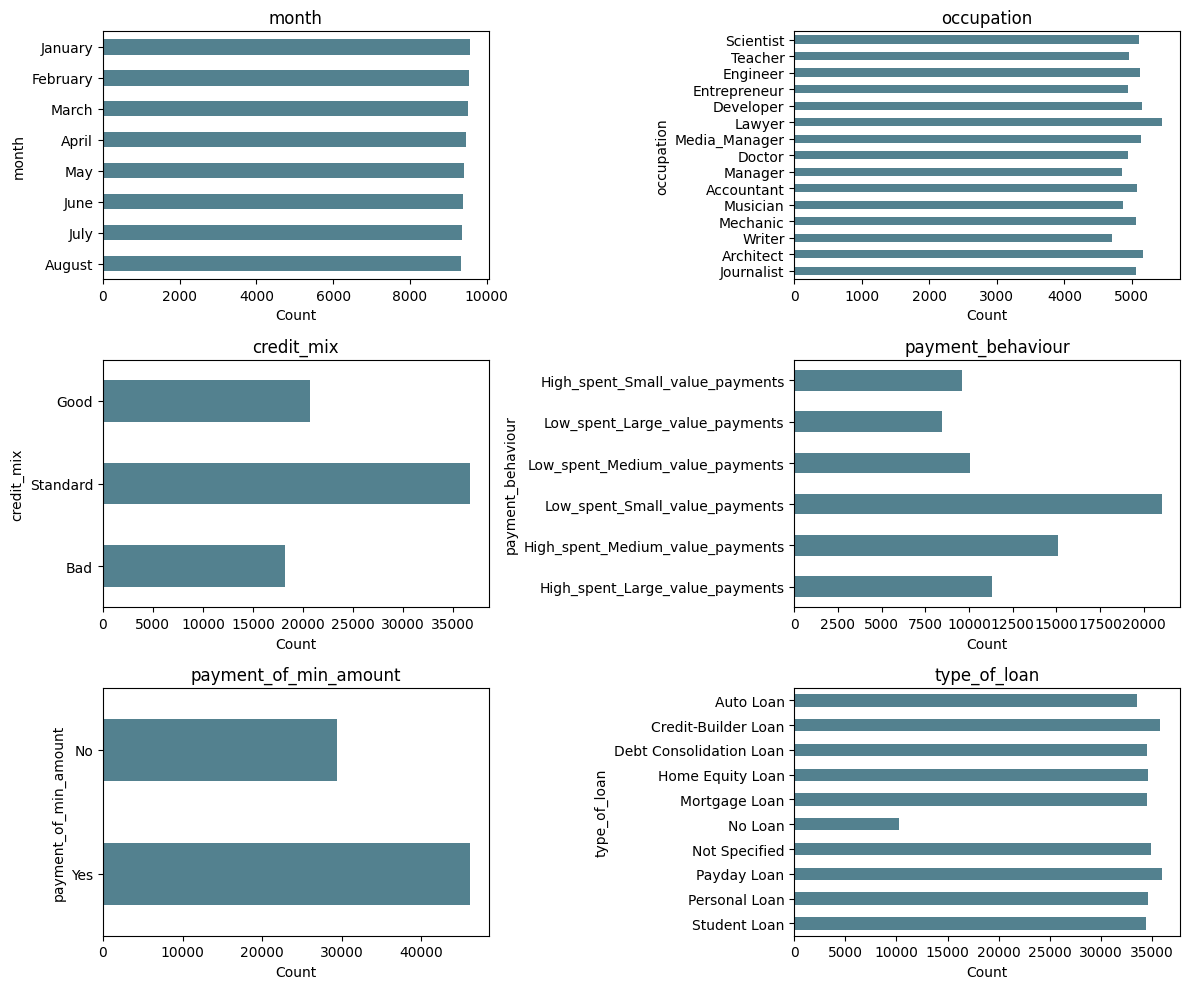

In [36]:
categoricalColumns = ['month', 'occupation', 'credit_mix', 'payment_behaviour', 'payment_of_min_amount']
dataFiltered = data[categoricalColumns]
numPlots = len(categoricalColumns)
rows = (numPlots // 2) + 1
cols = 2  
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(categoricalColumns):
    sns.countplot(data=dataFiltered, y=col, ax=axes[i], color='#498699', width=0.5, legend=False, orient='h')
    axes[i].set_title(col)
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('Count')

loanTypeCounts = loanData.groupby('loan_type')['loan_count'].sum().reset_index()
sns.barplot(x='loan_count', y='loan_type', data=loanTypeCounts, ax=axes[numPlots], color='#498699', width=0.5)
axes[numPlots].set_title('type_of_loan')
axes[numPlots].set_xlabel('Count')
axes[numPlots].set_ylabel('type_of_loan')

for j in range(numPlots+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There is an almost even distribution in month, occupation and type_of_loan (except for no loan). In credit_mix, standard has the highest count whereas in payment_behaviour, low_spent_small_value_payments has the highest count. In payment_of_min_amount, Yes is the majority class which means that most of the times, customers paid just the minimum amount required for that month.

Comparing relationship between numerical columns and credit scores. Analysing how the distribution of numerical columns varies in each credit score category using box plots

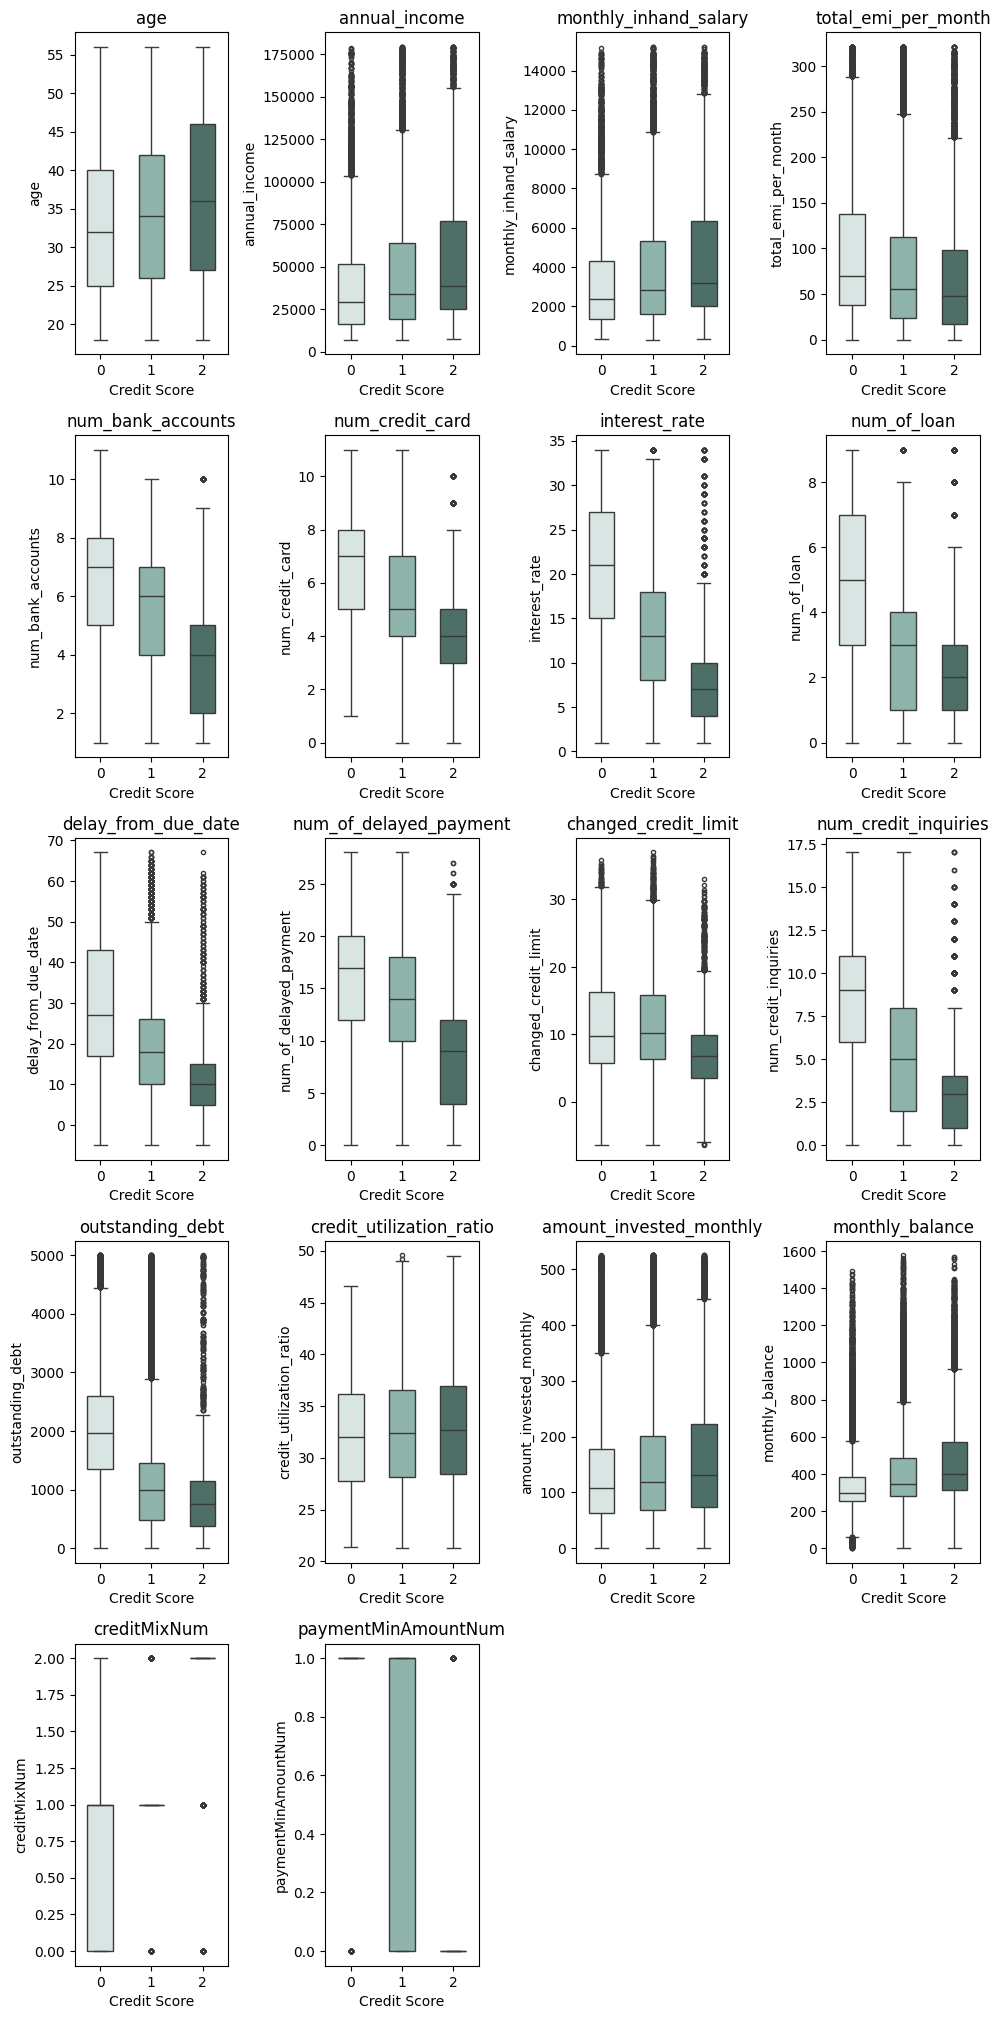

In [37]:
numericColumns = data.select_dtypes(include='number').columns.drop('credit_score')
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}

numPlots = len(numericColumns)
nCols = 4
nRows = (numPlots // 2) + 1
fig, axes = plt.subplots(nRows, nCols, figsize=(10, nRows * 4))
axes=axes.flatten()

for i, col in enumerate(numericColumns):
    sns.boxplot(data=data, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops={'markersize': 3})
    axes[i].set_title(col)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

The mean values of age, annual_income, monthly_in_hand salary, amount_invested_monthly and monthly_balance increase as the credit score increase. Whereas the mean values of total_emi_per_month, num_bank_accounts, num_credit_card, interest_rate, num_of_loan, delay_from_due_date (in days), num_of_delayed_payments, num_credit_inquiries, outstanding_debt decrease as the credit score increases. For changed_credit_limit and credit_utilization_ratio the mean values relatively stay the same across the credit scores.

Comparing distributions of numerical columns in each credit score using histograms. For every numeric column, the proportion of values in each credit score category is shown instead of the absolute count so that they can be fairly compared

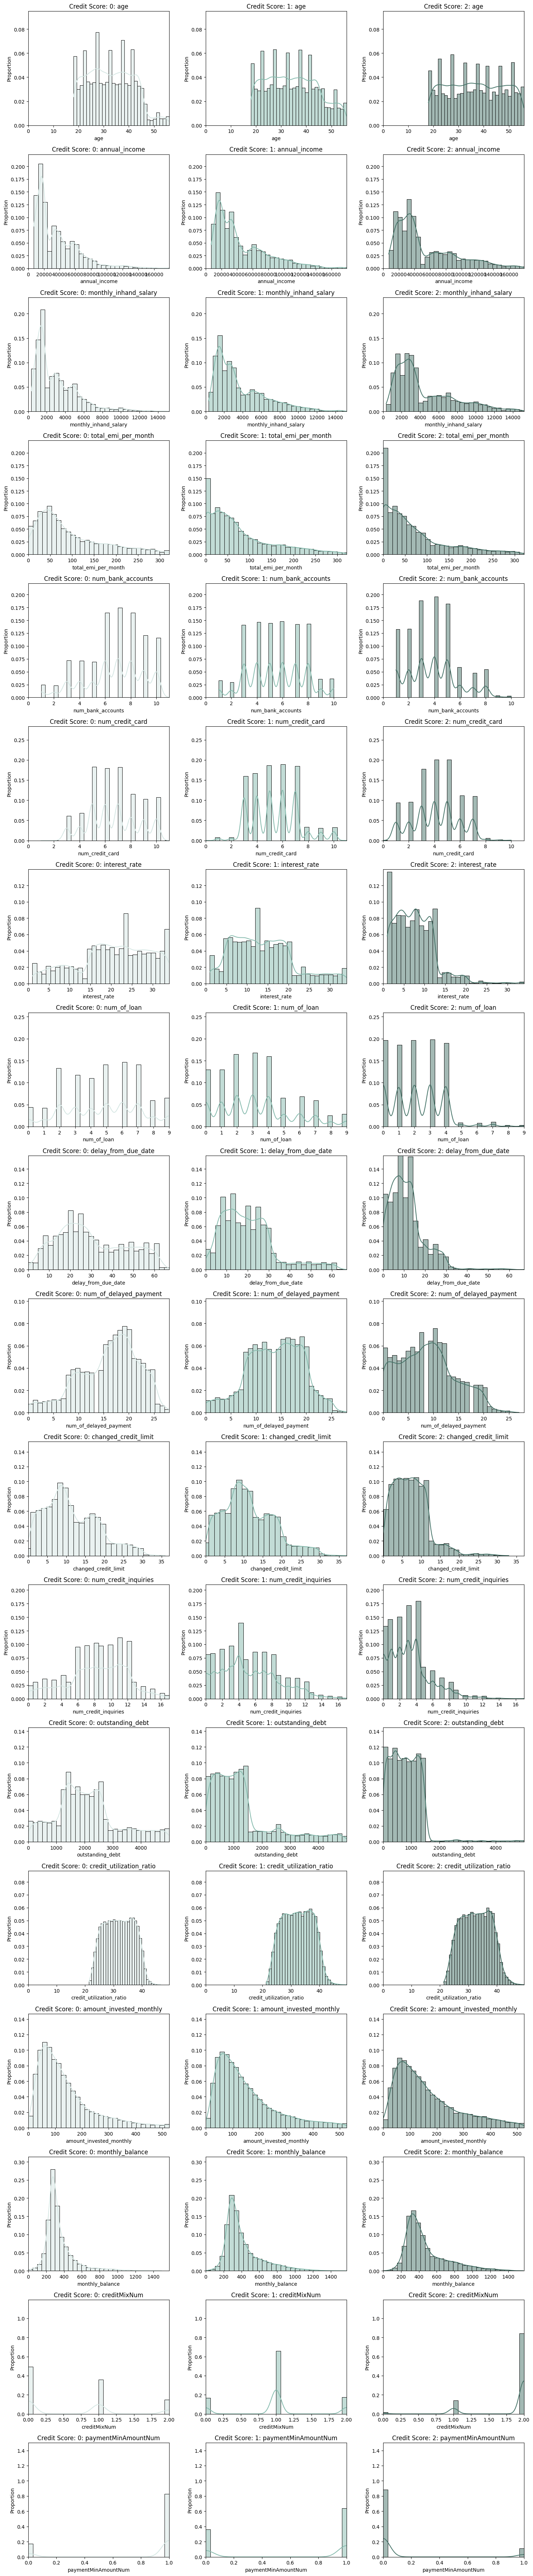

In [38]:
creditScores = {0: "Credit Score: 0", 1: "Credit Score: 1", 2: "Credit Score: 2"}
customPalette = {0: '#d6e7e4', 1: '#87bbae', 2: '#48756a'}

# Getting the limits for the y-axis for each numeric column by setting it equal to
# the value of the biggest bin in the histogram across all credit scores and 
# dividing it by the sum of all the bins and adding a buffer to leave some space 
# on top

globalXLimits = {}
globalYLimits = {}

for i, col in enumerate(numericColumns):
    xLimit = data[col].max()
    yLimit = 0
    yLimitPercent = 0
    _, bins, _ = plt.hist(data[col], bins=30)
    plt.close()
    for score in creditScores.keys():
        counts = [0] * (len(bins) - 1)
        for i in range(len(bins) - 1):
            creditScoreData = data[data['credit_score'] == score]
            counts[i] = sum((creditScoreData[col] >= bins[i]) & (creditScoreData[col] < bins[i + 1]))
        maxCounts = max(counts)
        if maxCounts > yLimit:
            yLimit = maxCounts
            yLimitPercent = yLimit/sum(counts)

    buffer = yLimitPercent * 0.5
    globalXLimits[col] = (0, xLimit)
    globalYLimits[col] = (0, yLimitPercent + buffer)


nCols = 3 
nRows = len(numericColumns)
fig, axes = plt.subplots(nRows, nCols, figsize=(15, nRows * 4))
axes = axes.reshape(nRows, nCols)

for i, col in enumerate(numericColumns):
    for j, score in enumerate(creditScores.keys()):
        sns.histplot(
            data=data[data['credit_score'] == score],
            x=col,
            kde=True,
            stat="probability",
            color=customPalette[score],
            ax=axes[i, j],
            bins=30
        )
        axes[i, j].set_title(f'{creditScores[score]}: {col}')
        axes[i, j].set_ylabel('Proportion')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_xlim(globalXLimits[col])
        axes[i, j].set_ylim(globalYLimits[col])

plt.tight_layout()
plt.show()

For the age column, out of all the customers with a good credit score, there is a higher proportion of customers above the age of 45 as compared to the customers with a poor and standard credit score. Moreover, a greater proportion of customers with a good credit have fewer bank accounts as compared to the ones with a poor and standard score. A greater proportion of customers with a good credit score have a lower interest rate as compared to the ones with a poor and standard score but this may be because they are eligible for lower interest rates. A large proportion of good credit score customers also take fewer loans. They also have shorter delays from the due date and lesser delayed payments as well. Moreover, almost all of the customers with a good credit score have either no outstanding debt or debt less than 1500 whereas customers with a standard or poor credit score do have higher outstanding debts. Credit utilization rate is similar across the credit scores. 

Analyzing the relationships between categorical columns and credit scores using bar charts

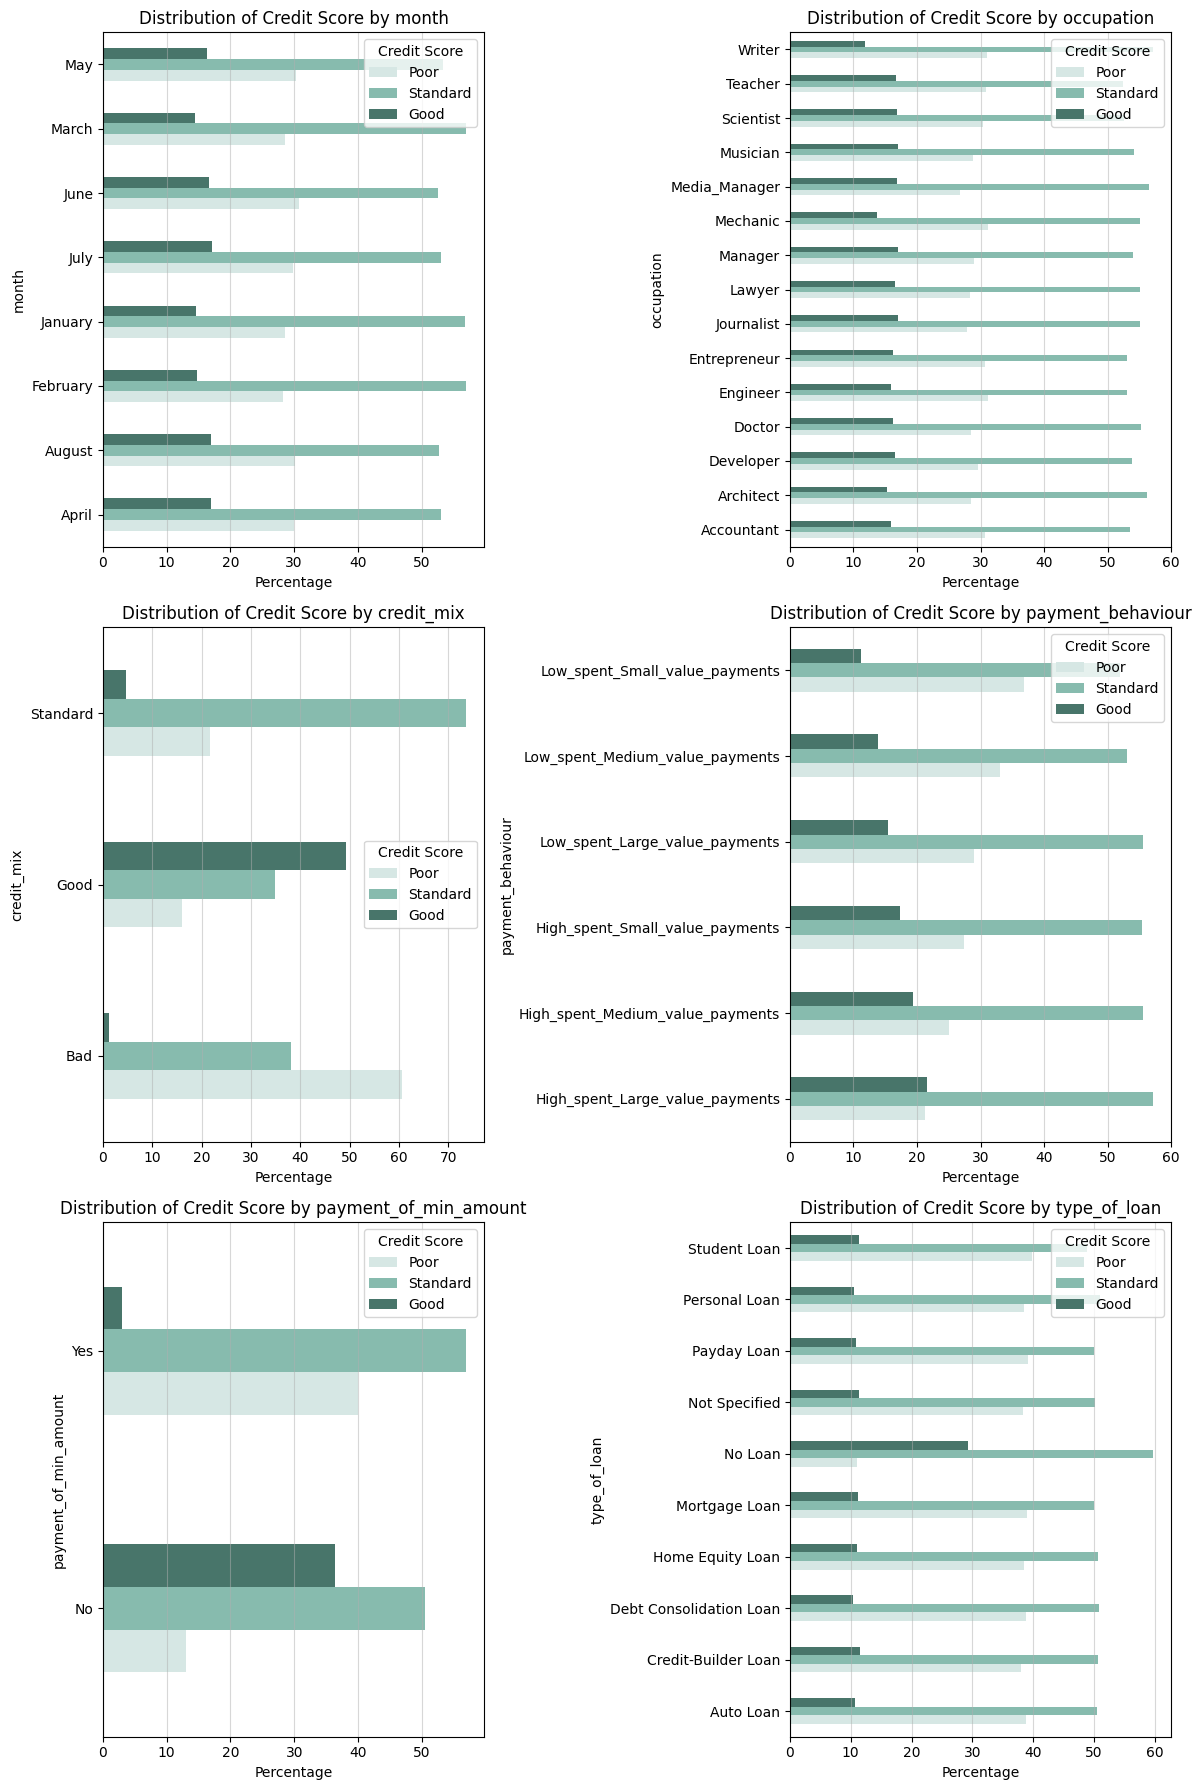

In [39]:
categoricalColumns = ['month', 'occupation', 'credit_mix', 'payment_behaviour', 'payment_of_min_amount']
dataFiltered = data[categoricalColumns]
customPalette = {0: '#d6e7e4', 1: '#87bbae', 2: '#48756a'}

numPlots = len(categoricalColumns)
nCols = 2
nRows = (numPlots + 1) // nCols
fig, axes = plt.subplots(nRows, nCols, figsize=(12, nRows * 6))
axes = axes.flatten()

for i, col in enumerate(categoricalColumns):
    crossTab = pd.crosstab(data[col], data['credit_score'], normalize='index') * 100
    crossTab.plot(kind='barh', color=customPalette, ax=axes[i])  
    axes[i].set_title(f'Distribution of Credit Score by {col}')
    axes[i].set_xlabel('Percentage')
    axes[i].set_ylabel(col)
    axes[i].legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
    axes[i].grid(axis='x', alpha=0.5) 

loanDataPercentage = pd.crosstab(loanData['loan_type'], loanData['credit_score'], loanData['loan_count'], aggfunc='sum', normalize='index') * 100
loanDataPercentage.plot(kind='barh', color=customPalette, ax=axes[numPlots])
axes[numPlots].set_title('Distribution of Credit Score by type_of_loan')
axes[numPlots].set_xlabel('Percentage')
axes[numPlots].set_ylabel('type_of_loan')
axes[numPlots].legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
axes[numPlots].grid(axis='x', alpha=0.5) 


for j in range(numPlots+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Distribution of credit score across month, occupation, payment_behaviour and type_of_loan is similar in which 1 (standard) is the majority in every category followed by 0 (poor) and then 2 (good). However in the No Loan class in type_of_loan, 1 (standard) is followed by 2 (good) which is higher than 0 (poor). In credit_mix, the majority class relates to the credit score. In Good credit mix, the majority class is 2 (good), in Standard credit mix, the majority class is 1 (standard) whereas in Bad credit mix, the majority class is 0 (poor). In payment_of_min_amount, customers who did not pay just the minimum amount and paid more have a majority of 1 (standard) credit scores, closely followed by 2 (good) credit scores and a few 0 (poor) credit scores. However, those who paid just the minimum amount, also have a majority of 1 (standard) credit scores but followed by 0 (poor) credit scores and with a very few 2 (good) credit scores.

Analyzing the distribution of credit_mix within each credit score

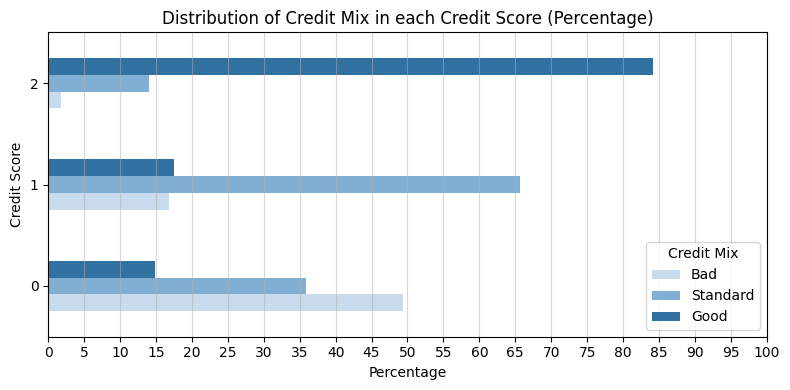

In [40]:
creditMixDistributionPercent = pd.crosstab(data['credit_score'], data['credit_mix'], normalize='index') * 100
creditMixDistributionPercent = creditMixDistributionPercent[['Bad', 'Standard', 'Good']]   

creditMixDistributionPercent.plot(kind='barh', figsize=(8, 4), color=['#c7dbed', '#81afd3', '#3171a2'])
plt.title('Distribution of Credit Mix in each Credit Score (Percentage)')
plt.ylabel('Credit Score')
plt.xlabel('Percentage')
plt.legend(title='Credit Mix')
plt.xticks(range(0, 101, 5))
plt.grid(axis='x', alpha=0.5) 
plt.tight_layout()
plt.show()

The figure shows that around 50% of the customers who have a 0 (poor) credit score have a bad credit mix. More than 65% of the customers who have a standard credit score have a 1 (standard) credit mix. Lastly more than 80% of the customers who have a 2 (good) score have a good credit mix as well.

Analyzing the distribution of payment_of_min_amount within each credit score

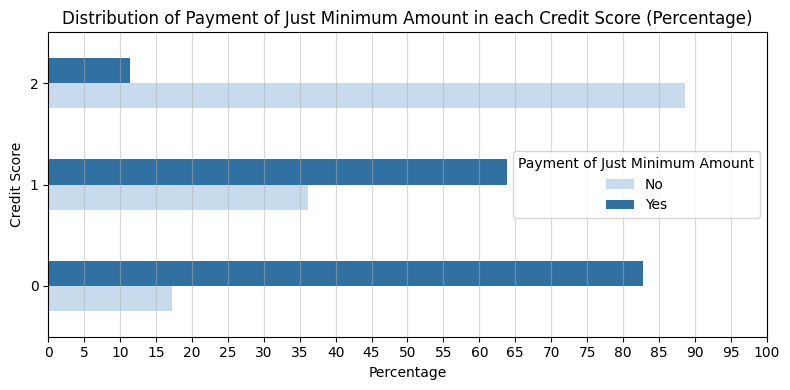

In [41]:
minAmtPaymentDistributionPercent = pd.crosstab(data['credit_score'], data['payment_of_min_amount'], normalize='index') * 100

minAmtPaymentDistributionPercent.plot(kind='barh', figsize=(8, 4), color=['#c7dbed', '#3171a2'])
plt.title('Distribution of Payment of Just Minimum Amount in each Credit Score (Percentage)')
plt.ylabel('Credit Score')
plt.xlabel('Percentage')
plt.legend(title='Payment of Just Minimum Amount')
plt.xticks(range(0, 101, 5))
plt.grid(axis='x', alpha=0.5) 
plt.tight_layout()
plt.show()

According to the figure, more then 80% of the customers with a 0 (poor) credit score and more than 60% of the customers with a 1 (standard) credit score paid just the minimum amount. Whereas more than 85% of the customers with a 2 (good) credit score did not pay just the minimum amount and paid more than that.

Analyzing correlations between the variables using a correlation matrix

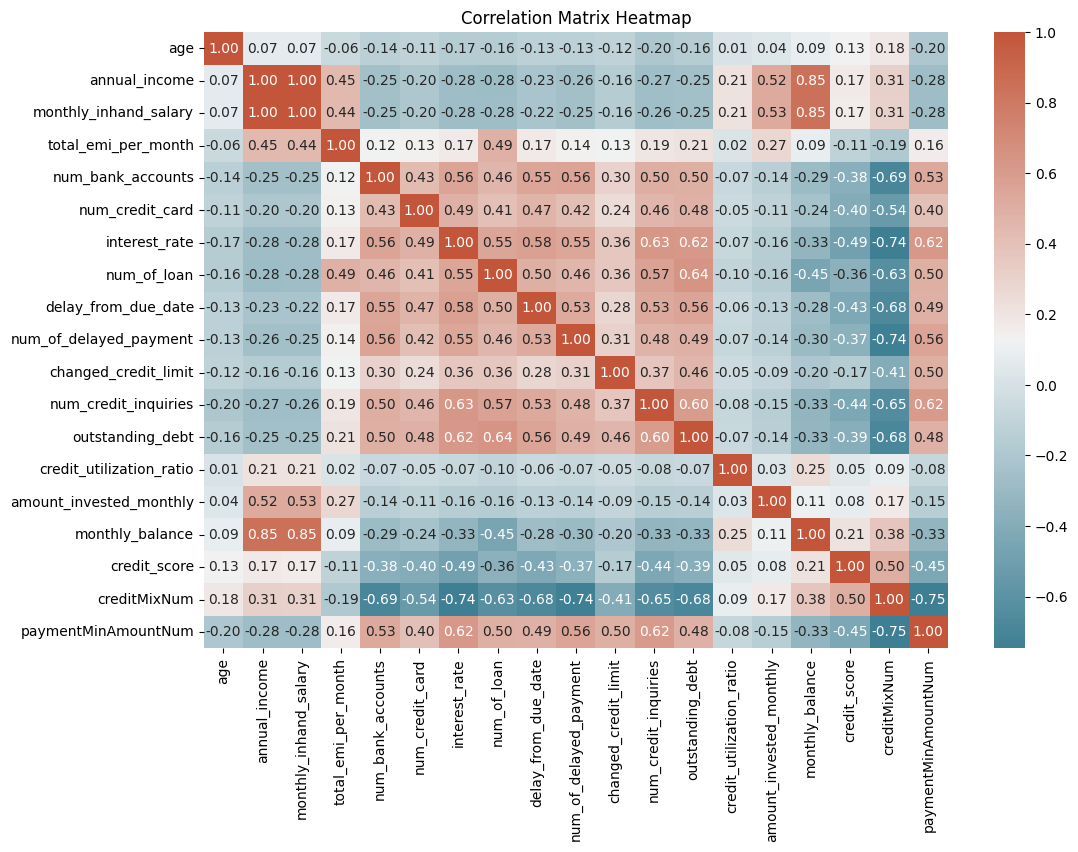

In [42]:
correlationMatrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), fmt='.2f', cbar=True, 
            xticklabels=correlationMatrix.columns, yticklabels=correlationMatrix.columns)

plt.title('Correlation Matrix Heatmap')
plt.show()

Displaying the correlation of each numerical variables with the class column (credit_score), sorted according to the absolute value of the correlation

In [43]:
correlationWithCreditScore = correlationMatrix['credit_score'].sort_values(key=lambda x: x.abs(), ascending=False)

correlationTable = correlationWithCreditScore.reset_index()
correlationTable.columns = ['Column', 'Correlation with Credit Score']
correlationTableDF = pd.DataFrame(correlationTable)
correlationTableDF

Column  Correlation with Credit Score
0               credit_score                       1.000000
1               creditMixNum                       0.503210
2              interest_rate                      -0.489897
3        paymentMinAmountNum                      -0.445331
4       num_credit_inquiries                      -0.444827
5        delay_from_due_date                      -0.426085
6            num_credit_card                      -0.402652
7           outstanding_debt                      -0.385321
8          num_bank_accounts                      -0.384407
9     num_of_delayed_payment                      -0.366263
10               num_of_loan                      -0.361444
11           monthly_balance                       0.210586
12             annual_income                       0.168098
13     monthly_inhand_salary                       0.166953
14      changed_credit_limit                      -0.165160
15                       age                       0.127350
16       total_emi_per_month                      -0.112985
17   amount_invested_monthly                       0.081296
18  credit_utilization_ratio                       0.046568

Anova test to check which numerical variables have a significant relation with credit score. Followed by eta squared to check effect size. The code for correlation_ratio is cited from (Kiryl, 2021). Complete citation is in the references section at the end of this notebook 

1. 0.01 - Small effect size
2. 0.06 - Medium effect size
3. 0.14 or higher - Large effect size (Bobbitt, 2020)

In [44]:

def correlation_ratio(categories, values):     # (Kiryl, 2021)                       
    categories = np.array(categories)                                
    values = np.array(values)                                        
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))

results = {}
scores = [0, 1, 2]
for column in numericColumns:
    if column != 'credit_score':
        groupData = []
        for score in scores:
            columnData = data[data['credit_score'] == score][column].tolist()
            groupData.append(columnData)
            
        f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
        results[column] = {'F-statistic': f_stat, 'p-value': p_value}

        if (p_value <= 0.05):
            etaSquared = correlation_ratio(data['credit_score'], data[column])
            results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)

resultsDF

F-statistic        p-value  etaSquared
creditMixNum              14553.874261   0.000000e+00    0.278041
interest_rate             11940.754634   0.000000e+00    0.240106
paymentMinAmountNum       11041.741272   0.000000e+00    0.226116
num_credit_inquiries       9547.115407   0.000000e+00    0.201681
delay_from_due_date        8403.175426   0.000000e+00    0.181912
num_credit_card            7312.739885   0.000000e+00    0.162133
outstanding_debt           6878.150156   0.000000e+00    0.153982
num_bank_accounts          6709.186314   0.000000e+00    0.150769
num_of_delayed_payment     6427.953896   0.000000e+00    0.145368
num_of_loan                5778.281731   0.000000e+00    0.132624
changed_credit_limit       1917.378242   0.000000e+00    0.048287
monthly_balance            1755.573513   0.000000e+00    0.044393
annual_income              1099.083815   0.000000e+00    0.028262
monthly_inhand_salary      1083.676196   0.000000e+00    0.027877
age                         627.651202  4.502314e-271    0.016337
total_emi_per_month         518.058897  3.452158e-224    0.013523
amount_invested_monthly     251.754293  1.064334e-109    0.006618
credit_utilization_ratio     82.541678   1.554879e-36    0.002179

Chi Square test to check which categorical variables are associated or independent to the credit score. Followed by Cramer's V to check the level of association.

Using Cramers V to find the level of asociation between categorical columns and credit score. The function for cramers v corrected stat is cited from (Eunicien & Lee, 2021). Complete citation is in the references section at the end of this notebook 
1. "0.00 to 0.20: The result is weak. Although the result is statistically significant, the fields are only weakly associated."
2. "0.20 to 0.60: The result is moderate. The fields are moderately associated."
3. "0.60 to 1.00: The result is strong. The fields are strongly associated." (IBM, 2024)

In [45]:

def cramersCorrectedStat(confusionMatrix):      # (Eunicien & Lee, 2021)                                     
    """ calculate Cramers V statistic for categorial-categorial association.                
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusionMatrix)[0]
    n = confusionMatrix.sum().sum()
    phi2 = chi2/n
    r,k = confusionMatrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

results = {}

for col in categoricalColumns:
    contingencyTable = pd.crosstab(data['credit_score'], data[col])
    chi2, p, _, _ = chi2_contingency(contingencyTable)
    results[col] = {'chi2': chi2, 'p-value': p}

    if (p <= 0.05):
        results[col]["cramer's v"] = cramersCorrectedStat(contingencyTable)


contingencyTable = pd.crosstab(loanData['credit_score'], loanData['loan_type'], loanData['loan_count'], aggfunc='sum')
chi2, p, _, _ = chi2_contingency(contingencyTable)
results['type_of_loan'] = {'chi2': chi2, 'p-value': p}

if (p <= 0.05):
    results['type_of_loan']["cramer's v"] = cramersCorrectedStat(contingencyTable)    

resultsDF = pd.DataFrame(results).T
resultsDF.sort_values("cramer's v", ascending=False, inplace=True)
resultsDF


chi2       p-value  cramer's v
payment_of_min_amount  17090.736583  0.000000e+00    0.475492
credit_mix             32538.092101  0.000000e+00    0.463922
payment_behaviour       1553.138207  0.000000e+00    0.101036
type_of_loan            5180.361282  0.000000e+00    0.089370
occupation               160.750248  1.384363e-20    0.029634
month                    125.971050  4.232041e-20    0.027216

Out of all the categorical columns, payment_of_min_amount and credit_mix have a moderate association with credit score.

After analyzing the data and looking at how FICO uses features to rank credit scores (Demyanyk, 2010), this study will examine the influences of two domains on credit score. They are debt management and payment behaviour. According to this paper (Hayashi & Stavins, 2012), demographic factors also have a tendency to influence credit scores hence the study will also examine the effect of a customer's demographic factors on their credit score.

Aggregating relevant features and credit scores for customer segmentation

In [46]:
customerData = data.groupby('customer_id').agg({
    'outstanding_debt': 'mean',
    'num_of_loan': 'mean',
    'num_credit_card': 'mean',
    'delay_from_due_date': 'mean',
    'num_of_delayed_payment': 'mean',
    'paymentMinAmountNum': 'mean',
    'age': 'mean',
    'annual_income': 'mean',
    'credit_score': 'mean'
}).reset_index()

customerData['num_of_loan'] = customerData['num_of_loan'].round().astype(int)
customerData['num_credit_card'] = customerData['num_credit_card'].round().astype(int)
customerData['delay_from_due_date'] = customerData['delay_from_due_date'].round().astype(int)
customerData['num_of_delayed_payment'] = customerData['num_of_delayed_payment'].round().astype(int)
customerData['paymentMinAmountNum'] = customerData['paymentMinAmountNum'].round().astype(int)
customerData['age'] = customerData['age'].round().astype(int)
customerData['annual_income'] = customerData['annual_income'].round().astype(int)

customerData['credit_score'] = customerData['credit_score'].round().astype(int)

customerData.head()

customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009            202.68            4                5   
1  CUS_0x100b           1030.20            0                4   
2  CUS_0x1011            473.14            3                3   
3  CUS_0x1013           1233.51            3                3   
4  CUS_0x1015            340.22            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  
0          52313             1  
1         113781             0  
2          58918             1  
3          98621             1  
4          46951             2

Checking the credit score class distribution after aggregating

In [47]:
scoreCounts = customerData['credit_score'].value_counts()
scorePercentages = customerData['credit_score'].value_counts(normalize=True) * 100
scoreSummary = pd.DataFrame({
    'Count': scoreCounts,
    'Percentage (%)': scorePercentages
})


print("Credit score counts and percentages:\n", scoreSummary.sort_index())

Credit score counts and percentages:
    Count  Percentage (%)
0   3512       32.761194
1   5231       48.796642
2   1977       18.442164


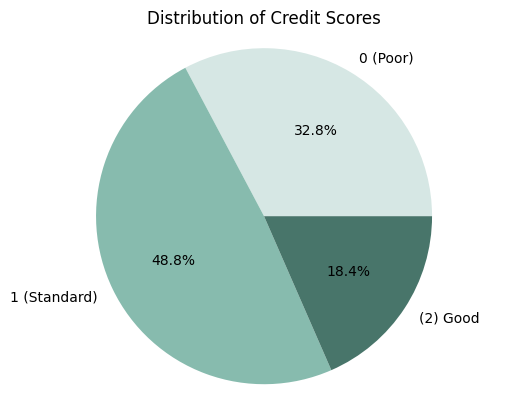

In [48]:
plt.pie(scoreCounts.sort_index(), labels=['0 (Poor)', '1 (Standard)', '(2) Good'], autopct='%1.1f%%', colors=['#d6e7e4', '#87bbae', '#48756a'])
plt.title("Distribution of Credit Scores")
plt.axis('equal')
plt.show()

Checking the correlation of variables after aggregation

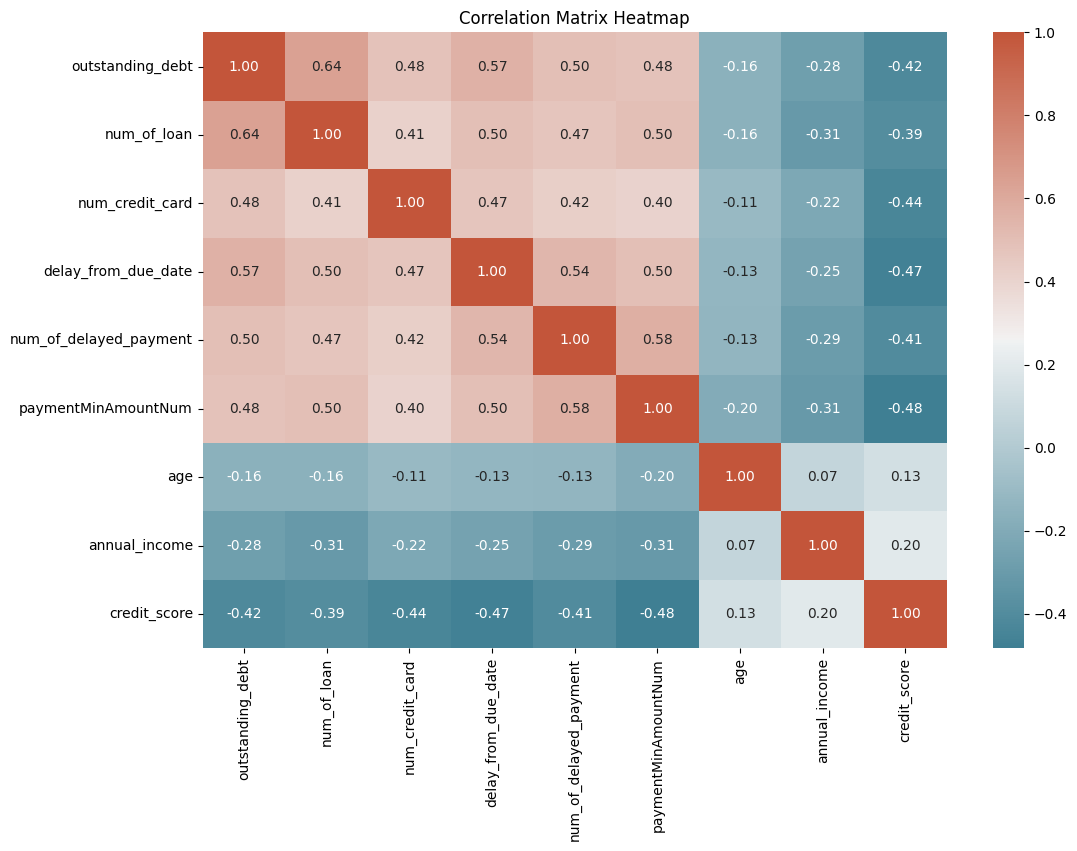

In [49]:
correlationMatrix = customerData.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), fmt='.2f', cbar=True, 
            xticklabels=correlationMatrix.columns, yticklabels=correlationMatrix.columns)

plt.title('Correlation Matrix Heatmap')
plt.show()

First Research Question: How do specific debt management features impact the likelihood of an individual achieving a good credit score?

Analyzing the distribution of debt management features using box plots and histograms

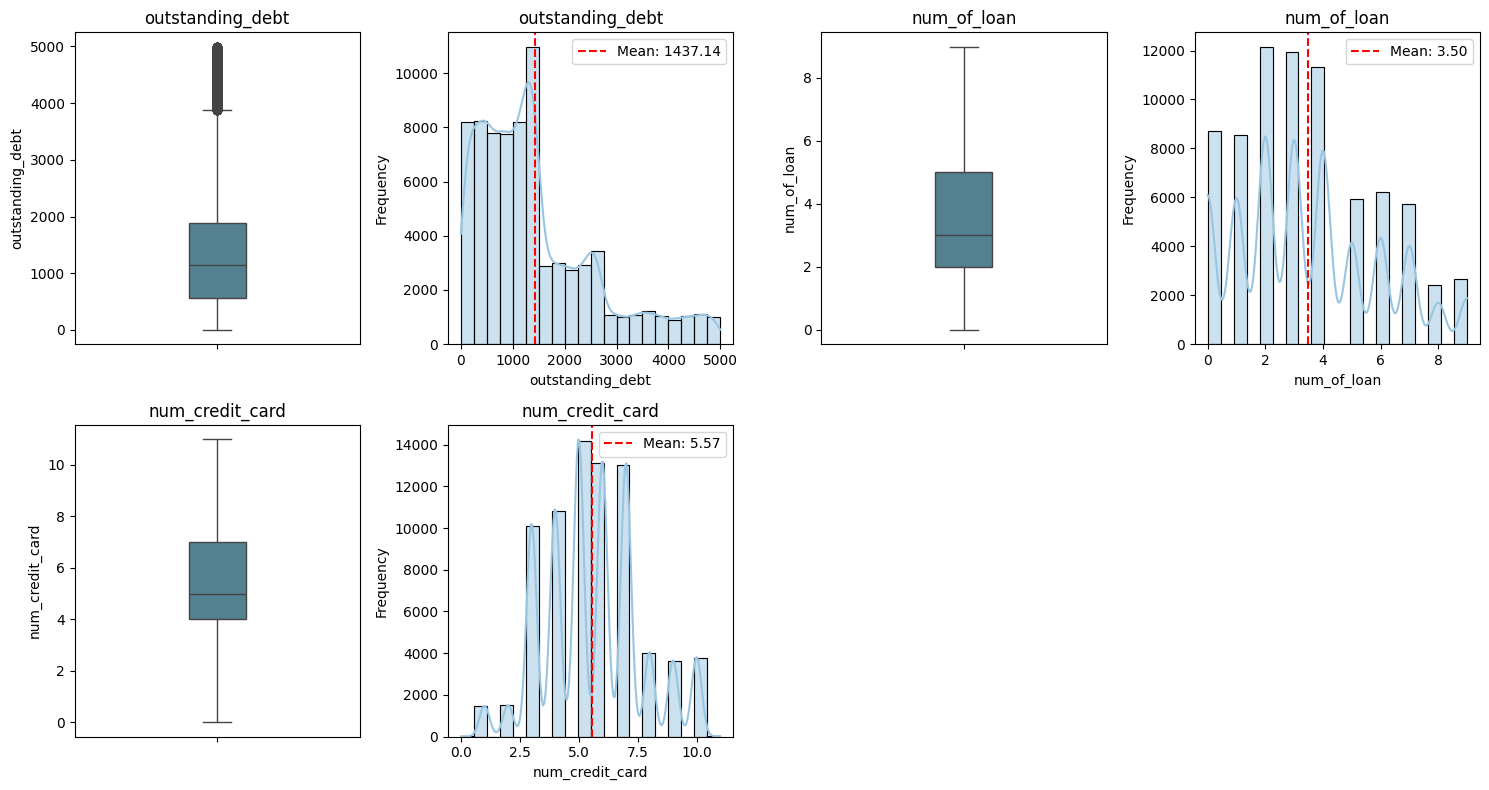

In [50]:
debtManagementColumns = ['outstanding_debt', 'num_of_loan', 'num_credit_card']

numPlots = len(debtManagementColumns)
rows = (numPlots // 2) + 1
cols = 4  

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(debtManagementColumns):
    sns.boxplot(data=customerData, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(col)
    axes[2 * i].set_ylabel(col)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=20)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(col)
    axes[2 * i + 1].set_xlabel(col)
    axes[2 * i + 1].set_ylabel('Frequency')

for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analyzing the distributon of debt management features in each credit score class using box plots. This is included in the report

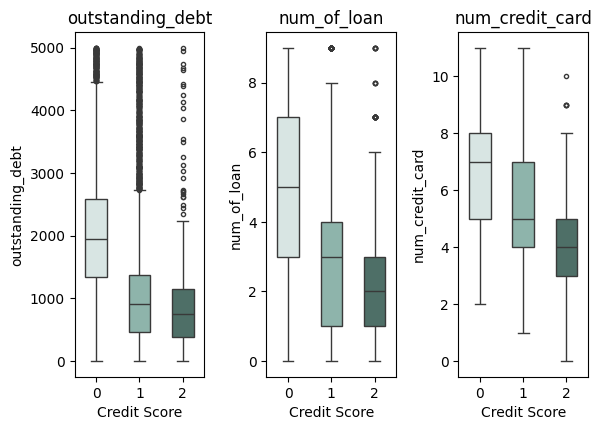

In [51]:
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}

fig, axes = plt.subplots(rows, cols, figsize=(8, rows * 4))
axes = axes.flatten()

for i, col in enumerate(debtManagementColumns):
    sns.boxplot(data=customerData, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops={'markersize': 3})
    axes[i].set_title(col)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('graphs/debtManagement(EDA).png', dpi=300, transparent=True)
plt.show()

Anova test to check if there is significance difference between the debt management attributes of customers belonging to different credit scores. Followed by eta squared to check effect size. This is included in the report

In [52]:
def correlation_ratio(categories, values):   # (Kiryl, 2021)
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2

    return (ssb / (ssb + ssw))

results = {}
scores = [0, 1, 2]
for column in debtManagementColumns:
    groupData = []
    for score in scores:
        columnData = customerData[customerData['credit_score'] == score][column].tolist()
        groupData.append(columnData)
        
    f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
    results[column] = {'F-statistic': f_stat, 'p-value': p_value}

    if (p_value <= 0.05):
        etaSquared = correlation_ratio(customerData['credit_score'], customerData[column])
        results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)
resultsDF

F-statistic  p-value  etaSquared
num_credit_card   1294.553660      0.0    0.194580
outstanding_debt  1228.892796      0.0    0.186552
num_of_loan       1006.234045      0.0    0.158095

Customer Segmentation based on Debt Management variables using K Mean Clustering

Features for clustering: Outstanding debt and number of loans

Using Silhoutte Score to find ideal number of clusters. This code for Silhoutte analysis is influenced by (Scikit-Learn, 2024). Full reference is mentioned at the end of this notebook.

Number of Clusters: 2, Silhouette Score: 0.5588
Number of Clusters: 3, Silhouette Score: 0.4256
Number of Clusters: 4, Silhouette Score: 0.3821
Number of Clusters: 5, Silhouette Score: 0.4039
Number of Clusters: 6, Silhouette Score: 0.3934


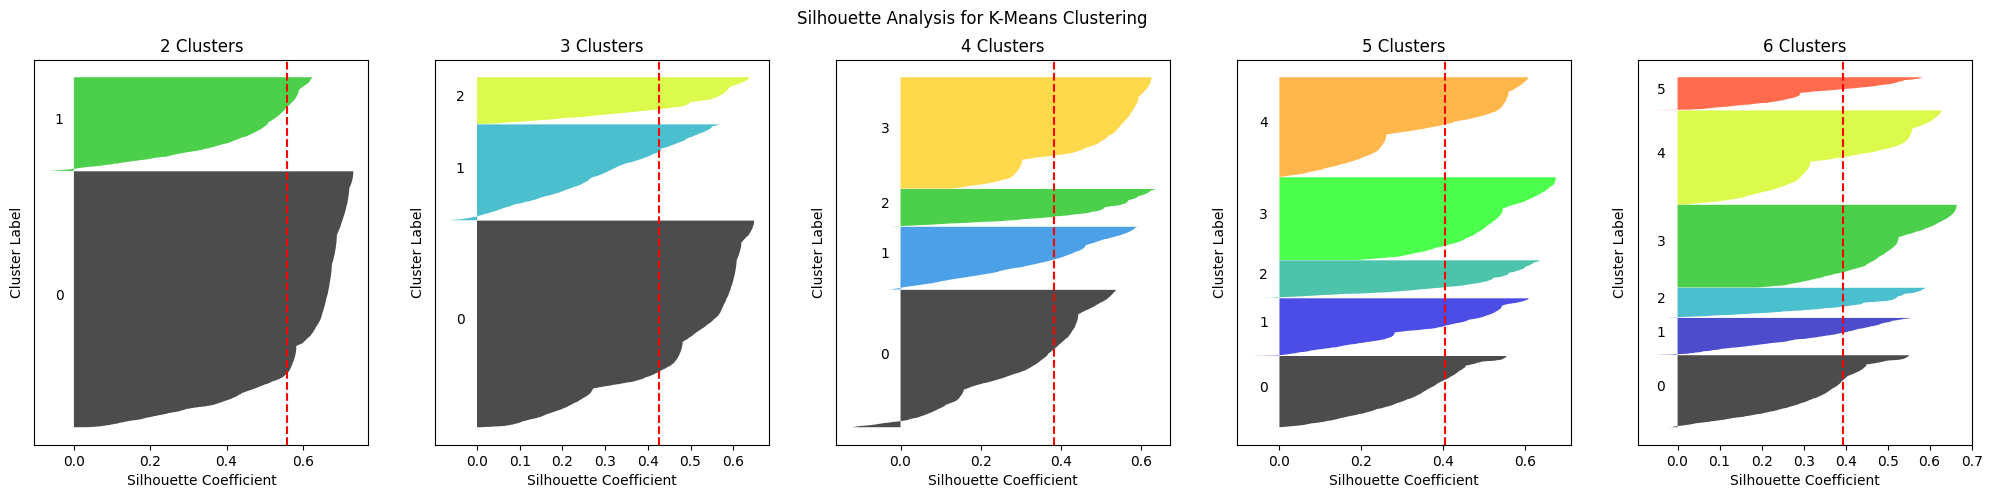

In [53]:
features = ['outstanding_debt', 'num_of_loan']
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[features])

clusterRange = [2,3,4,5,6] 
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering")

for i, nClusters in enumerate(clusterRange):                                            
    ax = axes[i]    
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(debtManagementScaled)
    silhouetteAvg = silhouette_score(debtManagementScaled, clusterLabels)
    silhouetteValues = silhouette_samples(debtManagementScaled, clusterLabels)
    print(f"Number of Clusters: {nClusters}, Silhouette Score: {silhouetteAvg:.4f}")
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.show()

Although 5 clusters has a lower silhoutte score than 2 and 3, it is selected because the thickness of the silhoutte plots with 5 clusters are more balanced 

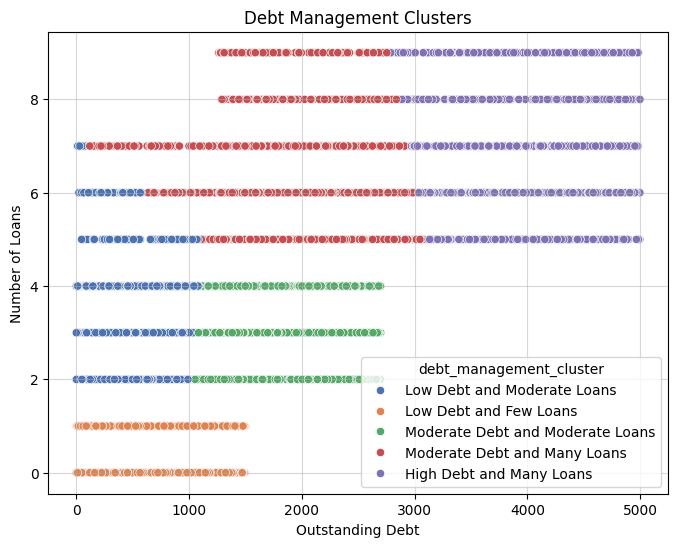

In [54]:
dataClusters = customerData.copy()
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
dataClusters['debt_management_cluster'] = kmeans.fit_predict(debtManagementScaled)
customLabels = {
    0: "Moderate Debt and Moderate Loans",
    1: "Moderate Debt and Many Loans",
    2: "High Debt and Many Loans",
    3: "Low Debt and Few Loans",
    4: "Low Debt and Moderate Loans",
}
dataClusters['debt_management_cluster'] = dataClusters['debt_management_cluster'].map(customLabels)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['outstanding_debt'], y=dataClusters['num_of_loan'], hue=dataClusters['debt_management_cluster'], palette='deep')
plt.title('Debt Management Clusters')
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Loans')
plt.grid(alpha=0.5) 
plt.show()

Displaying the distribution of credit scores in each cluster as a bar graph

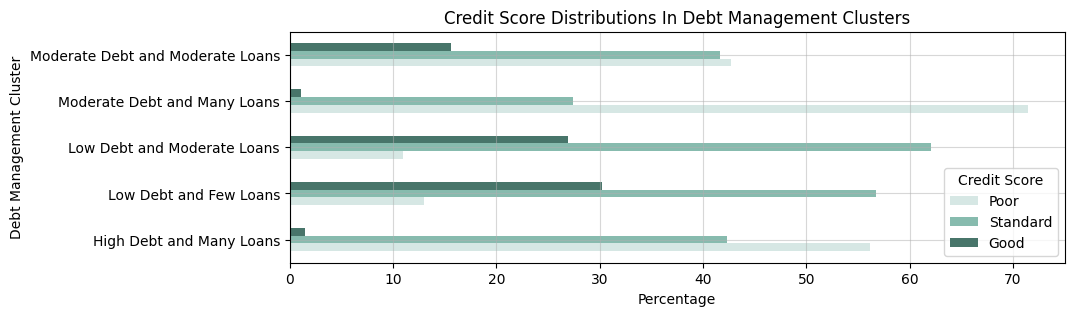

In [55]:
clusterScoreDistribution = pd.crosstab(dataClusters['debt_management_cluster'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distributions In Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(alpha=0.5) 
plt.show()

Displaying the distribution of credit scores in each cluster as a heatmap

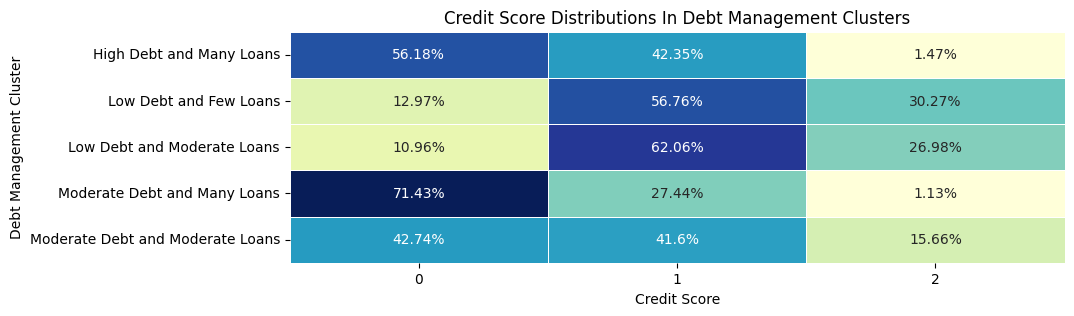

In [56]:
clusterScoreDistribution = clusterScoreDistribution.round(2)
annotations = clusterScoreDistribution.applymap(lambda x: f"{x}%")

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=annotations, cmap='YlGnBu', cbar=False, fmt='', linewidths=.5)

plt.title('Credit Score Distributions In Debt Management Clusters')
plt.ylabel('Debt Management Cluster')
plt.xlabel('Credit Score')
plt.show()

Features for clustering: Outstanding debt and number of credit cards

Using Silhoutte Score to find ideal number of clusters. This code for Silhoutte analysis is influenced by (Scikit-Learn, 2024). Full reference is mentioned at the end of this notebook.

Number of Clusters: 2, Silhouette Score: 0.5025
Number of Clusters: 3, Silhouette Score: 0.3993
Number of Clusters: 4, Silhouette Score: 0.3965
Number of Clusters: 5, Silhouette Score: 0.4313
Number of Clusters: 6, Silhouette Score: 0.3682


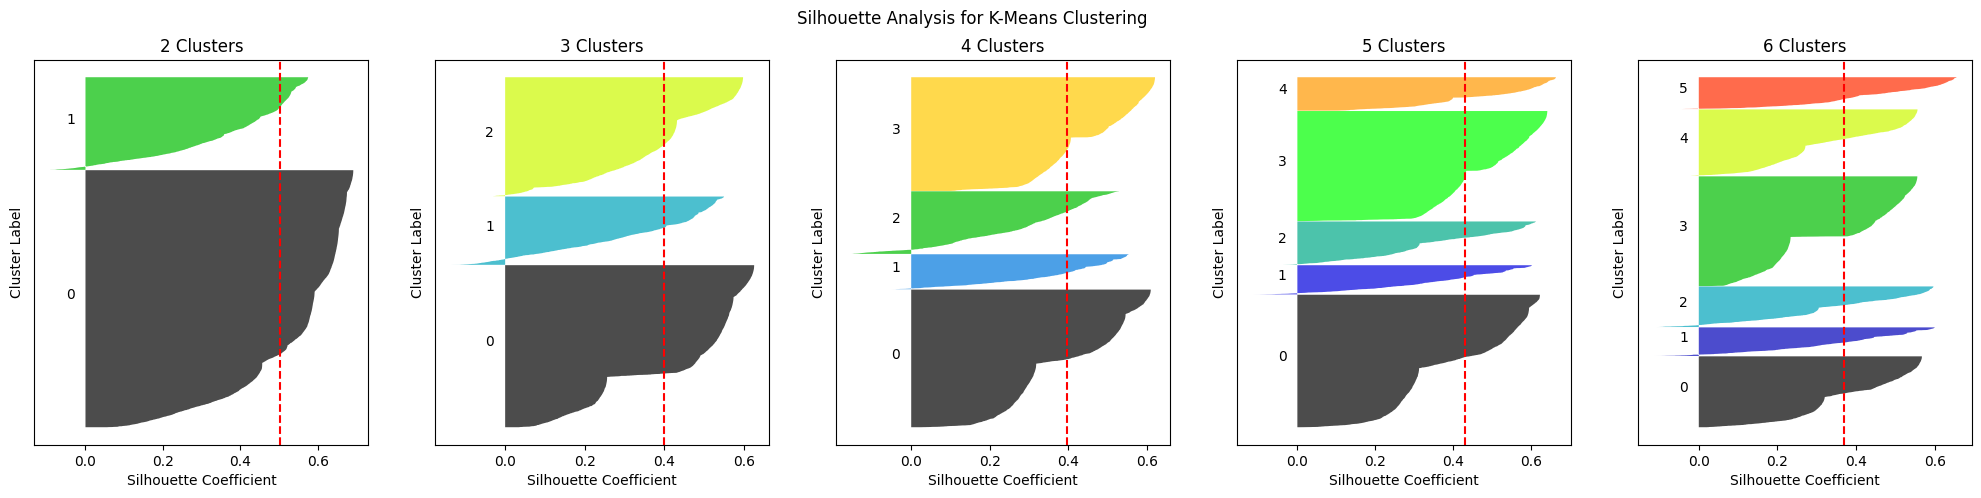

In [57]:
features = ['outstanding_debt', 'num_credit_card']
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[features])

clusterRange = [2,3,4,5,6]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering")

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(debtManagementScaled)
    silhouetteAvg = silhouette_score(debtManagementScaled, clusterLabels)
    silhouetteValues = silhouette_samples(debtManagementScaled, clusterLabels)
    print(f"Number of Clusters: {nClusters}, Silhouette Score: {silhouetteAvg:.4f}")
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.show()

5 clusters is selected over 2 clusters despite having a lower silhoutte score because in 2 clusters, the silhoutte plot of cluster 0 is too thick

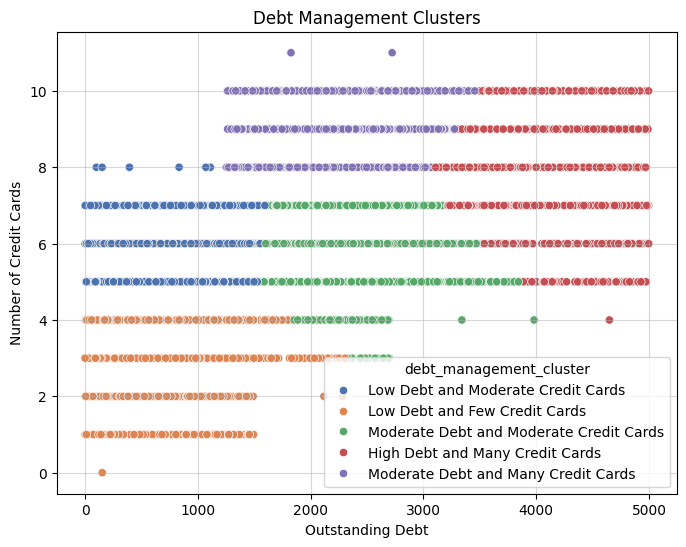

In [58]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
dataClusters['debt_management_cluster'] = kmeans.fit_predict(debtManagementScaled)
customLabels = {
    0: "Low Debt and Moderate Credit Cards",
    1: "High Debt and Many Credit Cards",
    2: "Moderate Debt and Moderate Credit Cards",
    3: "Low Debt and Few Credit Cards",
    4: "Moderate Debt and Many Credit Cards",
}
dataClusters['debt_management_cluster'] = dataClusters['debt_management_cluster'].map(customLabels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['outstanding_debt'], y=dataClusters['num_credit_card'], hue=dataClusters['debt_management_cluster'], palette='deep')
plt.title('Debt Management Clusters')
plt.xlabel('Outstanding Debt')
plt.ylabel('Number of Credit Cards')
plt.grid(alpha=0.5) 
plt.show()

Displaying the distribution of credit scores in each cluster as a bar graph

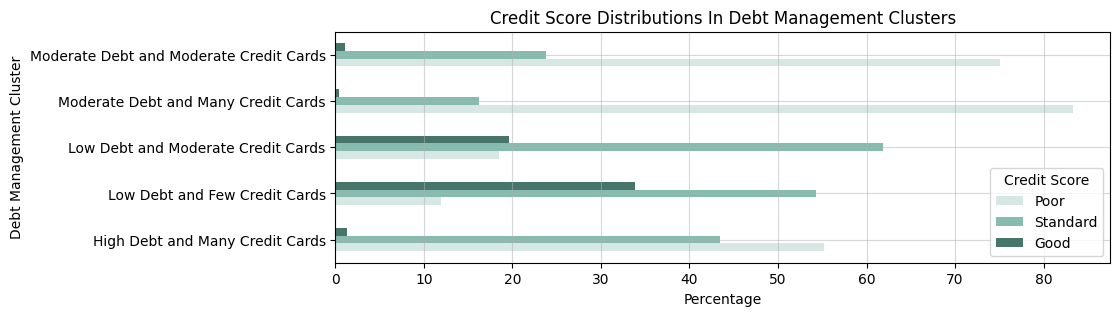

In [59]:
clusterScoreDistribution = pd.crosstab(dataClusters['debt_management_cluster'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distributions In Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(alpha=0.5) 
plt.show()

Displaying the distribution of credit scores in each cluster as a heatmap

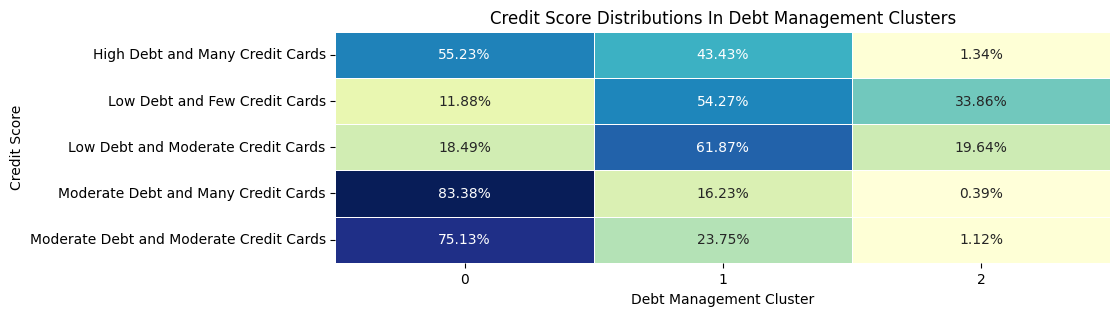

In [60]:
clusterScoreDistribution = clusterScoreDistribution.round(2)
annotations = clusterScoreDistribution.applymap(lambda x: f"{x}%")

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=annotations, cmap='YlGnBu', cbar=False, fmt='', linewidths=.5)

plt.title('Credit Score Distributions In Debt Management Clusters')
plt.xlabel('Debt Management Cluster')
plt.ylabel('Credit Score')
plt.show()

Clustering with all 3 variables (outstanding debt, number of loans and number of credit cards) belonging to debt management

Using Silhoutte Score to find ideal number of clusters. This code for Silhoutte analysis is influenced by (Scikit-Learn, 2024). Full reference is mentioned at the end of this notebook.

Number of Clusters: 2, Silhouette Score: 0.4691
Number of Clusters: 3, Silhouette Score: 0.3028
Number of Clusters: 4, Silhouette Score: 0.2907
Number of Clusters: 5, Silhouette Score: 0.2752
Number of Clusters: 6, Silhouette Score: 0.2849


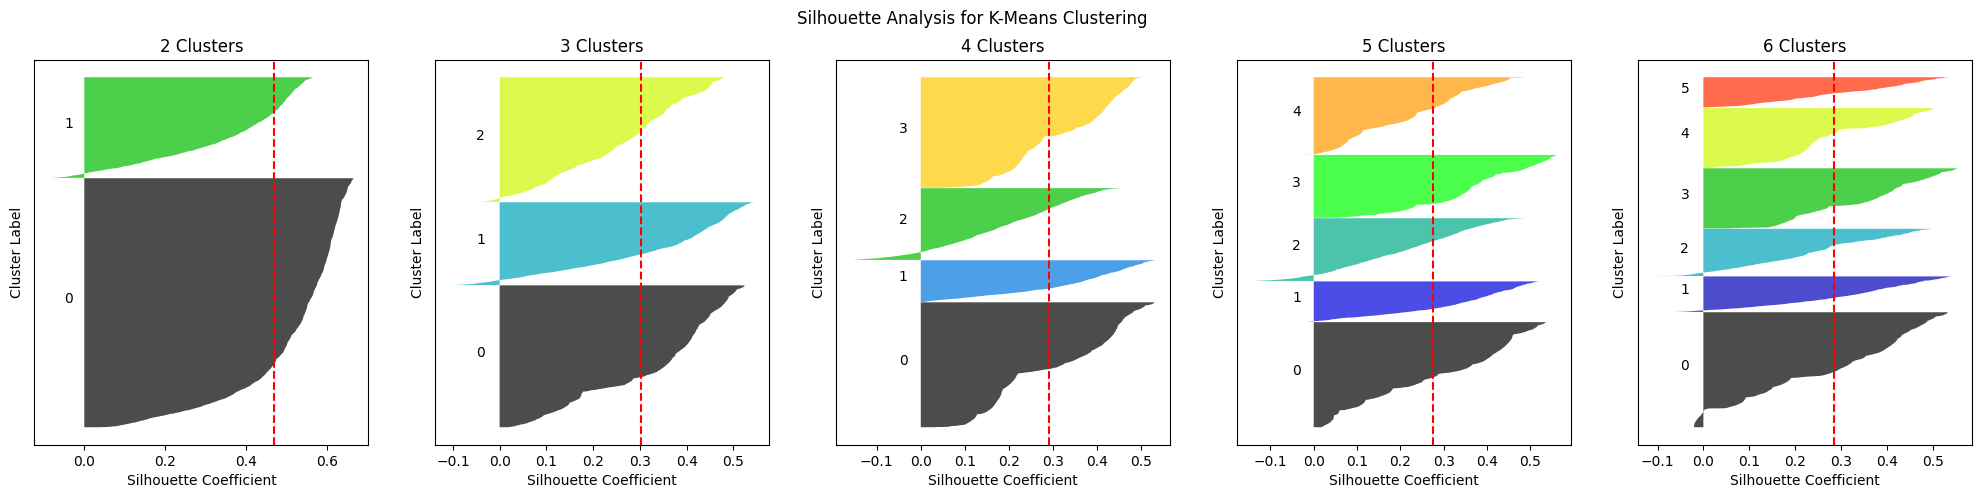

In [61]:
features = ['outstanding_debt', 'num_of_loan', 'num_credit_card']
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[features])

clusterRange = [2,3,4,5,6] 
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering")

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(debtManagementScaled)
    silhouetteAvg = silhouette_score(debtManagementScaled, clusterLabels)
    silhouetteValues = silhouette_samples(debtManagementScaled, clusterLabels)
    print(f"Number of Clusters: {nClusters}, Silhouette Score: {silhouetteAvg:.4f}")
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.show()

Even though 5 clusters has a lower silhoutte score, it is selected because the thickness of the silhoutte plots with 5 clusters is reasonably balanced

This cluster plot is included in the report. The code for 3d scatterplots has been influenced by (GeeksforGeeks, 2020) and (Matplotlib, 2014). Complete citations at the end of the notebook

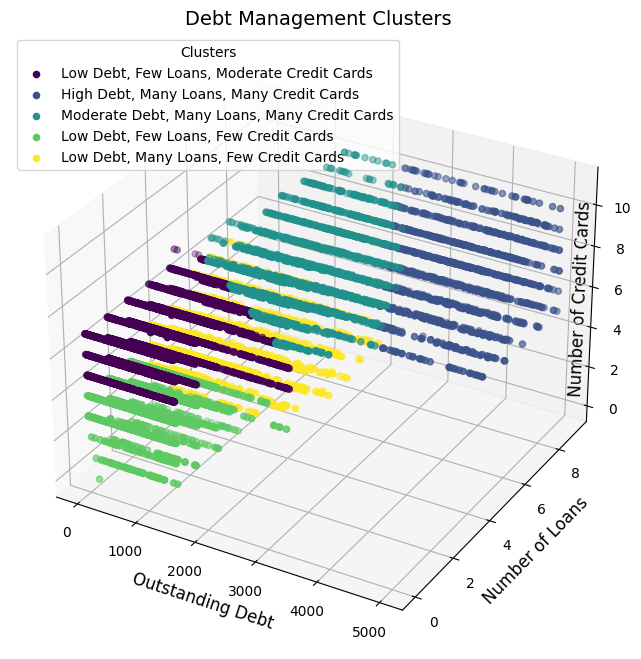

In [62]:

kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')                                     
dataClusters = customerData.copy()                                                                
dataClusters['debt_management_cluster'] = kmeans.fit_predict(debtManagementScaled)
customLabels = {
    0: "Low Debt, Few Loans, Moderate Credit Cards",
    1: "High Debt, Many Loans, Many Credit Cards",
    2: "Moderate Debt, Many Loans, Many Credit Cards",
    3: "Low Debt, Few Loans, Few Credit Cards",
    4: "Low Debt, Many Loans, Few Credit Cards",
}
dataClusters['debt_management_cluster'] = dataClusters['debt_management_cluster'].map(customLabels)

colours = cm.viridis(np.linspace(0, 1, 5))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for cluster in range(5):
    clusterData = dataClusters[dataClusters['debt_management_cluster'] == customLabels[cluster]]
    ax.scatter(
        clusterData['outstanding_debt'], 
        clusterData['num_of_loan'], 
        clusterData['num_credit_card'], 
        color=colours[cluster], 
        label=f'{customLabels[cluster]}', 
        s=20
    )

ax.set_title('Debt Management Clusters', fontsize=14)
ax.set_xlabel('Outstanding Debt', fontsize=12)
ax.set_ylabel('Number of Loans', fontsize=12)
ax.set_zlabel('Number of Credit Cards', fontsize=12, labelpad=-26)

ax.legend(title='Clusters', loc='upper left', fontsize=10)
plt.savefig('graphs/debtManagementClusters.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


Displaying the distribution of credit scores in each cluster as a bar graph

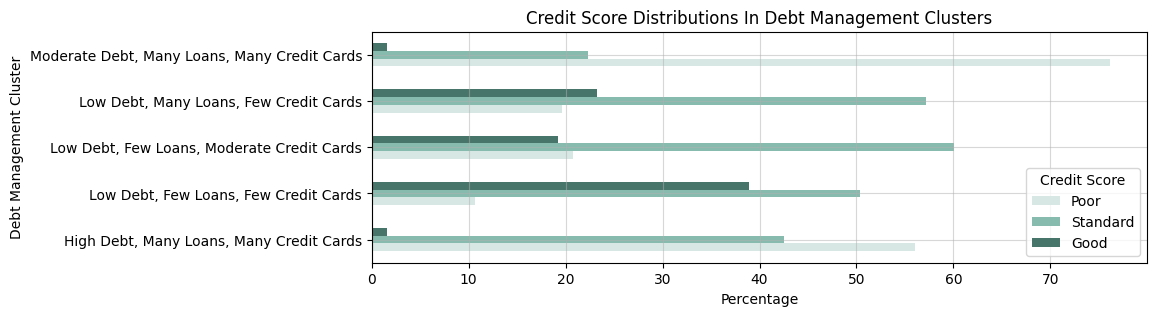

In [63]:
clusterScoreDistribution = pd.crosstab(dataClusters['debt_management_cluster'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distributions In Debt Management Clusters')
plt.xlabel('Percentage')
plt.ylabel('Debt Management Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(alpha=0.5)
plt.show()

Displaying the distribution of credit scores in each cluster as a heatmap. This plot is included in the report

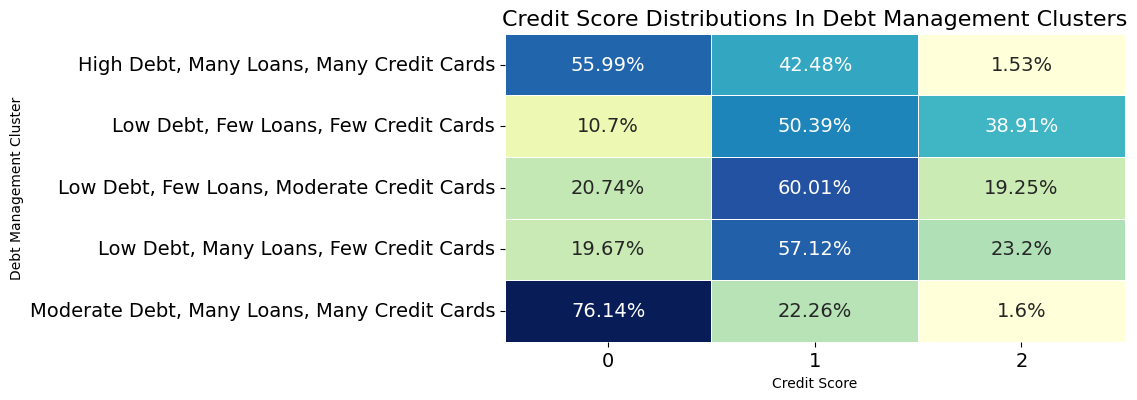

In [64]:
clusterScoreDistribution = clusterScoreDistribution.round(2)
annotations = clusterScoreDistribution.applymap(lambda x: f"{x}%")

plt.figure(figsize=(8, 4))
sns.heatmap(clusterScoreDistribution, annot=annotations, cmap='YlGnBu', cbar=False, fmt='', linewidths=.5, annot_kws={"size": 14})

plt.title('Credit Score Distributions In Debt Management Clusters', fontsize=16)
plt.ylabel('Debt Management Cluster')
plt.xlabel('Credit Score')
plt.yticks(fontsize=14)  
plt.xticks(fontsize=14)
plt.savefig('graphs/debtManagementResults.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Logistic Regression to predict credit score using debt management varialbes to quantify their impact

In [65]:
x = customerData[['outstanding_debt', 'num_credit_card', 'num_of_loan']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [66]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [67]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [68]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 62.03%


In [69]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficients_df = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

print(coefficients_df)

                  Credit Score 0  Credit Score 1  Credit Score 2
outstanding_debt        0.427311        0.005169       -0.432480
num_credit_card         0.529013        0.079216       -0.608229
num_of_loan             0.293723        0.036926       -0.330649


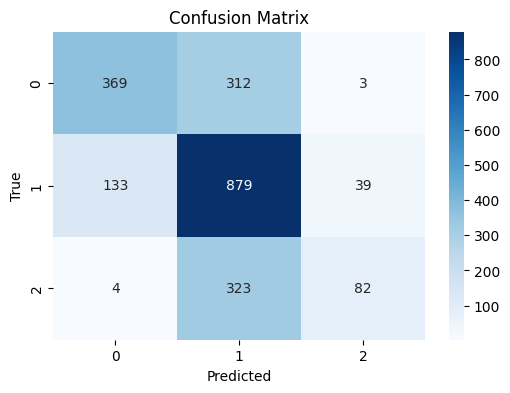

In [70]:
confusionMatrix = confusion_matrix(yTest, yPred)

plt.figure(figsize=(6, 4))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Second Research Question: What is the relationship between an individual’s payment behavior and their credit score?

Analyzing the distribution of payment behaviour features using boxplots and histograms

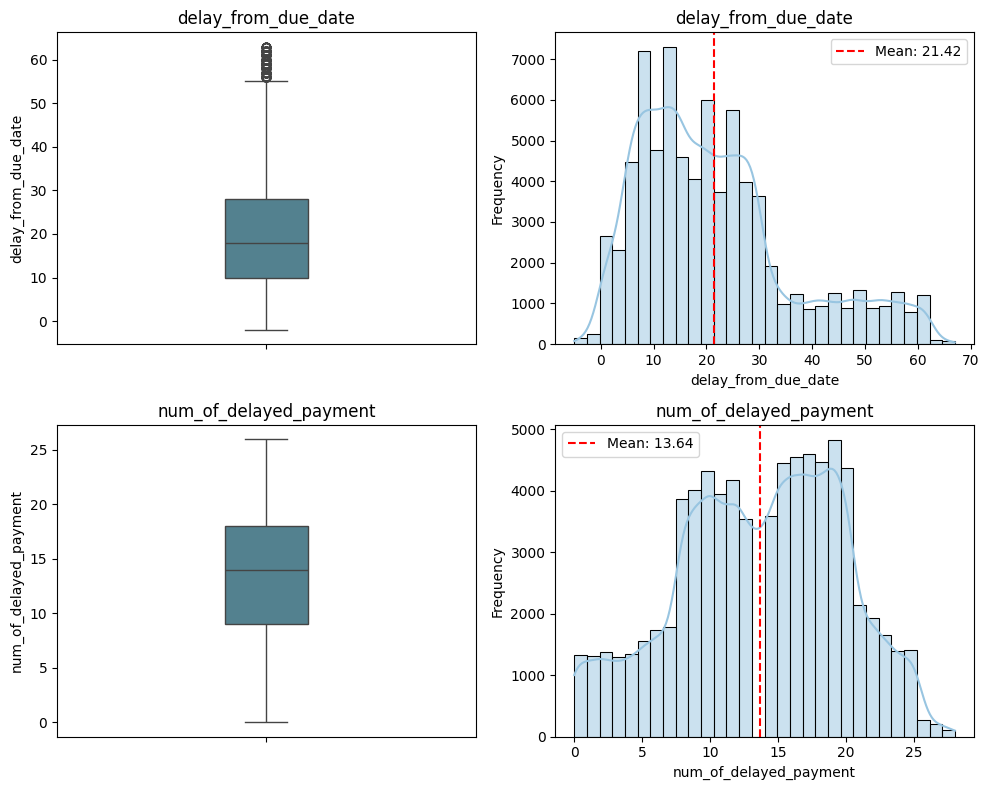

In [71]:
paymentBehaviourColumns = ['delay_from_due_date', 'num_of_delayed_payment']

numPlots = len(paymentBehaviourColumns)
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 4))
axes = axes.flatten()

for i, col in enumerate(paymentBehaviourColumns):
    sns.boxplot(data=customerData, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(col)
    axes[2 * i].set_ylabel(col)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=30)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(col)
    axes[2 * i + 1].set_xlabel(col)
    axes[2 * i + 1].set_ylabel('Frequency')

for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Examining the number of customers who paid just the minimum amount (1) and the customers who did not pay just the minimum amount and paid more (0)

Text(0.5, 0, 'Count')

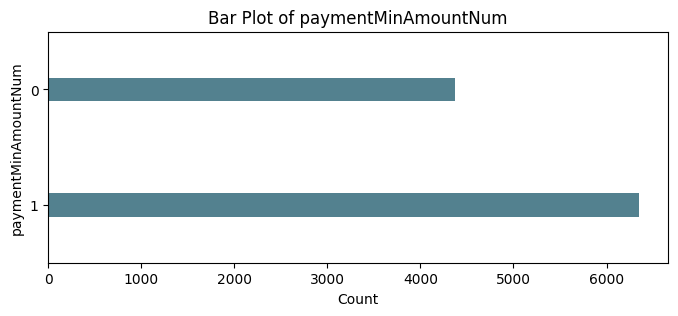

In [72]:
plt.figure(figsize=(8, 3))
sns.countplot(data=customerData, y='paymentMinAmountNum', color='#498699', width=0.2, legend=False, orient='h')
plt.title('Bar Plot of paymentMinAmountNum')
plt.ylabel('paymentMinAmountNum')
plt.xlabel('Count')

Comparing the distributions of payment behaviour features in each credit score class using box plots. This is included in the report

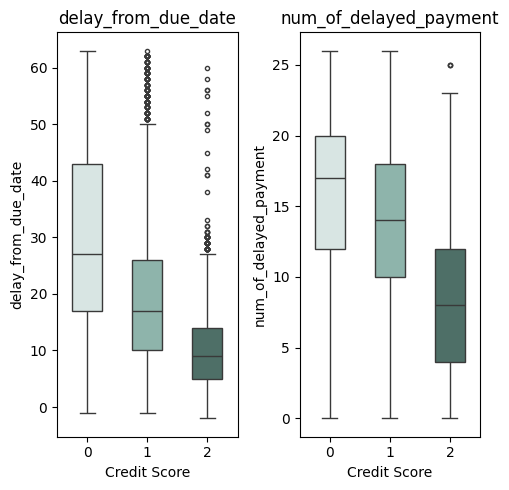

In [73]:
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}

fig, axes = plt.subplots(1, 2, figsize=(5, 5))
axes = axes.flatten()

for i, col in enumerate(paymentBehaviourColumns):
    sns.boxplot(data=customerData, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops={'markersize': 3})
    axes[i].set_title(col)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('graphs/paymentBehaviour(EDA).png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Comparing the distribution of credit scores in the category of customers who paid just the minimum amount and the category of customers who paid more then just the minimum amount. This is included in the report

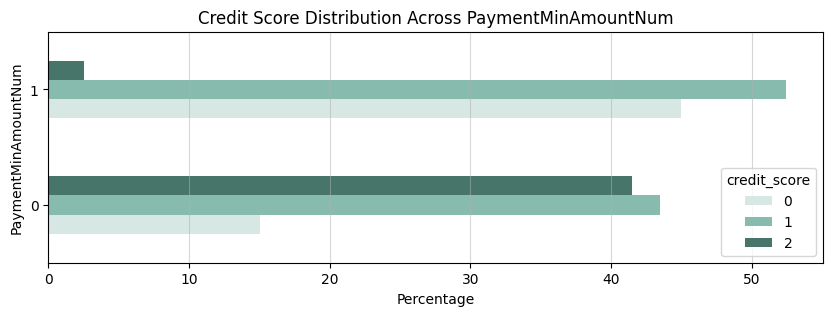

In [74]:
paymentMinAmountDistribution = pd.crosstab(customerData['paymentMinAmountNum'], customerData['credit_score'], normalize='index') * 100

paymentMinAmountDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distribution Across PaymentMinAmountNum')
plt.xlabel('Percentage')
plt.ylabel('PaymentMinAmountNum')
plt.grid(axis='x', alpha=0.5) 
plt.savefig('graphs/paymentBehaviour(EDA)v2.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Anova test to check if there is significance difference between the payment behaviour attributes of customers belonging to different credit scores. Followed by eta squared to check effect size. This is includd in the report

In [75]:
results = {}
scores = [0, 1, 2]
for column in paymentBehaviourColumns:
    groupData = []
    for score in scores:
        columnData = customerData[customerData['credit_score'] == score][column].tolist()
        groupData.append(columnData)
        
    f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
    results[column] = {'F-statistic': f_stat, 'p-value': p_value}

    if (p_value <= 0.05):
        etaSquared = correlation_ratio(customerData['credit_score'], customerData[column])
        results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)
resultsDF

F-statistic  p-value  etaSquared
delay_from_due_date     1540.769126      0.0    0.223324
num_of_delayed_payment  1175.577320      0.0    0.179915

Chi Square test to check if paymentMinAmountNum is associated or independent to the credit score. Followed by Cramer's V to check the level of association. This is included in the report

In [76]:
results = {}
contingencyTable = pd.crosstab(customerData['credit_score'], customerData['paymentMinAmountNum'])
chi2, p, _, _ = chi2_contingency(contingencyTable)
results['paymentMinAmountNum'] = {'chi2': chi2, 'p-value': p}

if (p <= 0.05):
    results['paymentMinAmountNum']["cramer's v"] = cramersCorrectedStat(contingencyTable)

print(results)

{'paymentMinAmountNum': {'chi2': 2879.7318747499944, 'p-value': 0.0, "cramer's v": 0.5181410680112958}}


Customer Segmentation based on Payment Behaviour using K Mean Clustering

Features for clustering: Delay from due date and number of delayed payments

Using Silhoutte Score to find ideal number of clusters. This code for Silhoutte analysis is influenced by (Scikit-Learn, 2024). Full reference is mentioned at the end of this notebook.

Number of Clusters: 2, Silhouette Score: 0.4218
Number of Clusters: 3, Silhouette Score: 0.4275
Number of Clusters: 4, Silhouette Score: 0.3754
Number of Clusters: 5, Silhouette Score: 0.3993
Number of Clusters: 6, Silhouette Score: 0.3959


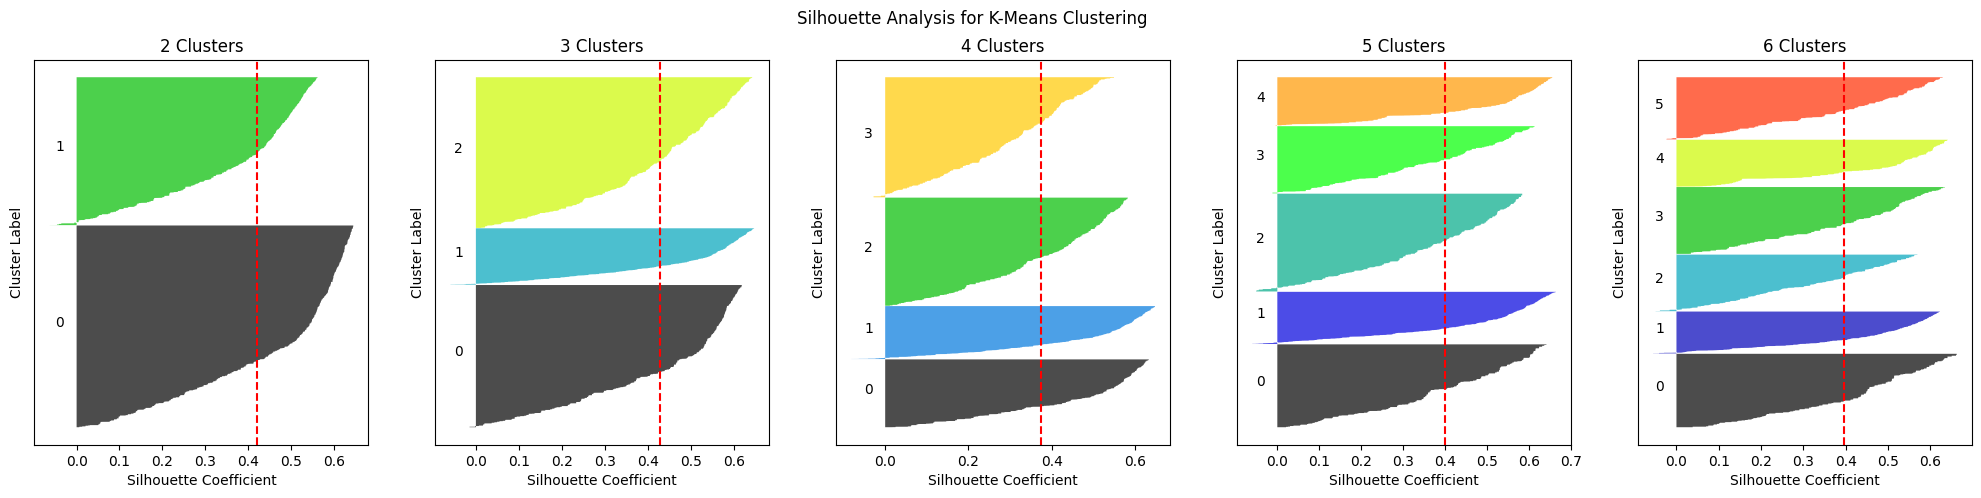

In [77]:
features = ['delay_from_due_date', 'num_of_delayed_payment']
scaler = StandardScaler()
paymentBehaviourScaled = scaler.fit_transform(customerData[features])

clusterRange = [2,3,4,5,6] 
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering")

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(paymentBehaviourScaled)
    silhouetteAvg = silhouette_score(paymentBehaviourScaled, clusterLabels)
    silhouetteValues = silhouette_samples(paymentBehaviourScaled, clusterLabels)
    print(f"Number of Clusters: {nClusters}, Silhouette Score: {silhouetteAvg:.4f}")
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.show()

3 clusters is selected since it has the highest silhoutte score and reasonable thickness of the silhoutte plots

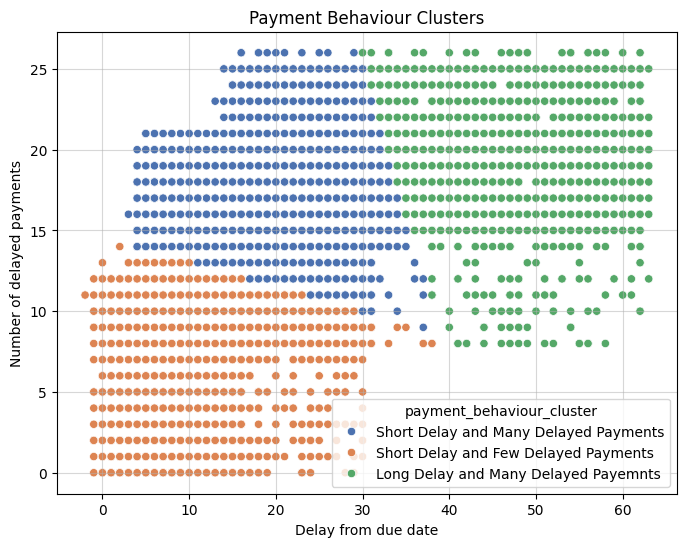

In [78]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
dataClusters['payment_behaviour_cluster'] = kmeans.fit_predict(paymentBehaviourScaled)
customLabels = {
    0: "Short Delay and Few Delayed Payments",
    1: "Long Delay and Many Delayed Payemnts",
    2: "Short Delay and Many Delayed Payments"
}
dataClusters['payment_behaviour_cluster'] = dataClusters['payment_behaviour_cluster'].map(customLabels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['delay_from_due_date'], y=dataClusters['num_of_delayed_payment'], hue=dataClusters['payment_behaviour_cluster'], palette='deep')
plt.title('Payment Behaviour Clusters')
plt.xlabel('Delay from due date')
plt.ylabel('Number of delayed payments')
plt.grid(alpha=0.5) 
plt.show()

Displaying the distribution of credit scores in each cluster as a bar graph

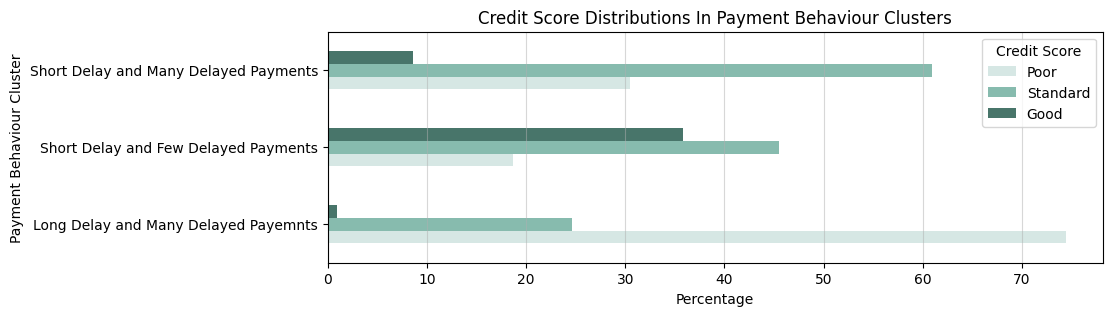

In [79]:
clusterScoreDistribution = pd.crosstab(dataClusters['payment_behaviour_cluster'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distributions In Payment Behaviour Clusters')
plt.xlabel('Percentage')
plt.ylabel('Payment Behaviour Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(axis='x', alpha=0.5) 
plt.show()

Displaying the distribution of credit scores in each cluster as a heatmap

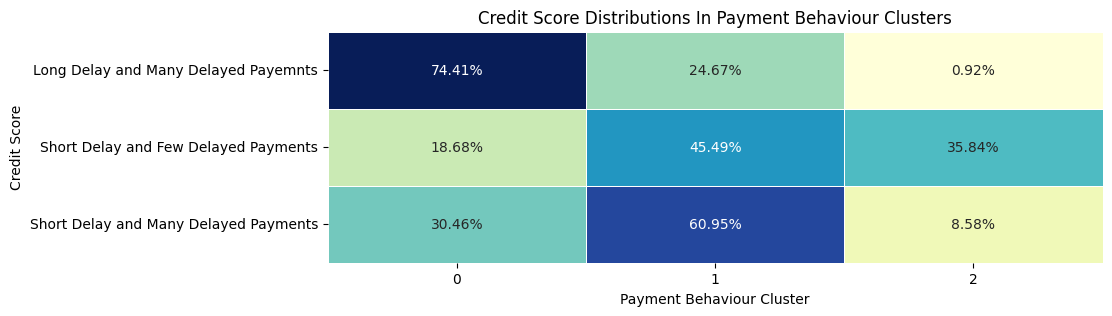

In [80]:
clusterScoreDistribution = clusterScoreDistribution.round(2)
annotations = clusterScoreDistribution.applymap(lambda x: f"{x}%")

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=annotations, cmap='YlGnBu', cbar=False, fmt='', linewidths=.5)

plt.title('Credit Score Distributions In Payment Behaviour Clusters')
plt.xlabel('Payment Behaviour Cluster')
plt.ylabel('Credit Score')
plt.show()

Clustering with all 3 variables of payment behaviour: delay from due date, number of delayed payments and payment of just the minimum amount

Using Silhoutte Score to find ideal number of clusters. This code for Silhoutte analysis is influenced by (Scikit-Learn, 2024). Full reference is mentioned at the end of this notebook.

Number of Clusters: 2, Silhouette Score: 0.4929
Number of Clusters: 3, Silhouette Score: 0.4794
Number of Clusters: 4, Silhouette Score: 0.4212
Number of Clusters: 5, Silhouette Score: 0.4136
Number of Clusters: 6, Silhouette Score: 0.3998


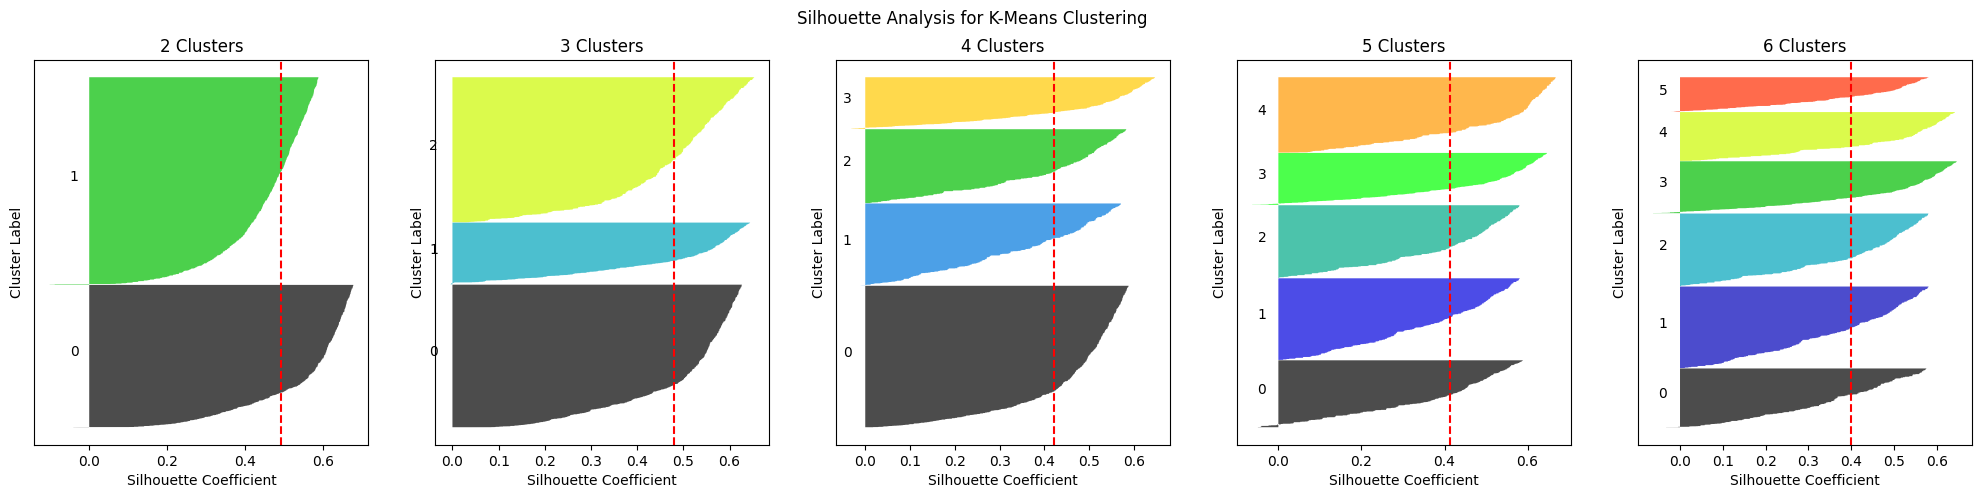

In [81]:
features = ['delay_from_due_date', 'num_of_delayed_payment', 'paymentMinAmountNum']
scaler = StandardScaler()
paymentBehaviourScaled = scaler.fit_transform(customerData[features])

clusterRange = [2,3,4,5,6]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering")

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(paymentBehaviourScaled)
    silhouetteAvg = silhouette_score(paymentBehaviourScaled, clusterLabels)
    silhouetteValues = silhouette_samples(paymentBehaviourScaled, clusterLabels)
    print(f"Number of Clusters: {nClusters}, Silhouette Score: {silhouetteAvg:.4f}")
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.show()


5 clusters is selected despite having a lower silhoutte score since the silhoutte plots have balanced thickness

Clustering using all three variables of payment behaviour. This is included in the report. The code for 3d scatterplots has been influenced by (GeeksforGeeks, 2020) and (Matplotlib, 2014). Complete citations at the end of the notebook

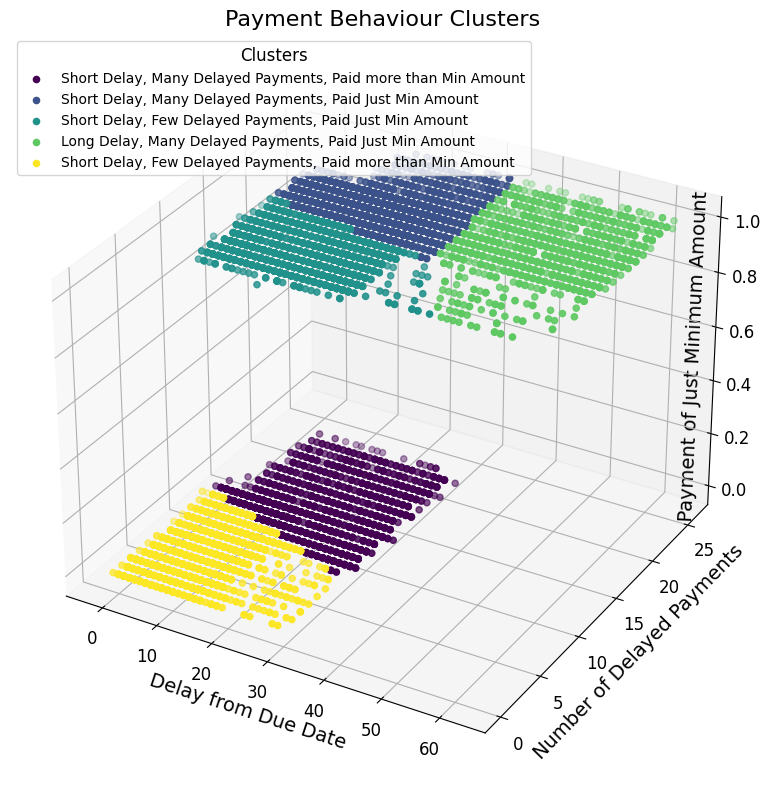

In [82]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
dataClusters['payment_behaviour_cluster'] = kmeans.fit_predict(paymentBehaviourScaled)
customLabels = {
    0: "Short Delay, Many Delayed Payments, Paid more than Min Amount",
    1: "Short Delay, Many Delayed Payments, Paid Just Min Amount",
    2: "Short Delay, Few Delayed Payments, Paid Just Min Amount",
    3: "Long Delay, Many Delayed Payments, Paid Just Min Amount",
    4: "Short Delay, Few Delayed Payments, Paid more than Min Amount"
}
dataClusters['payment_behaviour_cluster'] = dataClusters['payment_behaviour_cluster'].map(customLabels)

colours = cm.viridis(np.linspace(0, 1, 5))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for cluster in range(5):
    clusterData = dataClusters[dataClusters['payment_behaviour_cluster'] == customLabels[cluster]]
    ax.scatter(
        clusterData['delay_from_due_date'], 
        clusterData['num_of_delayed_payment'], 
        clusterData['paymentMinAmountNum'], 
        color=colours[cluster], 
        label=customLabels[cluster], 
        s=20
    )

ax.set_title('Payment Behaviour Clusters', fontsize=16)
ax.set_xlabel('Delay from Due Date', fontsize=14)
ax.set_ylabel('Number of Delayed Payments', fontsize=14)
ax.set_zlabel('Payment of Just Minimum Amount', fontsize=14, labelpad=-30)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)
ax.legend(title='Clusters', loc='upper left', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.savefig('graphs/paymentBehaviourClusters.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Displaying the distribution of credit scores in each cluster using a bar graph

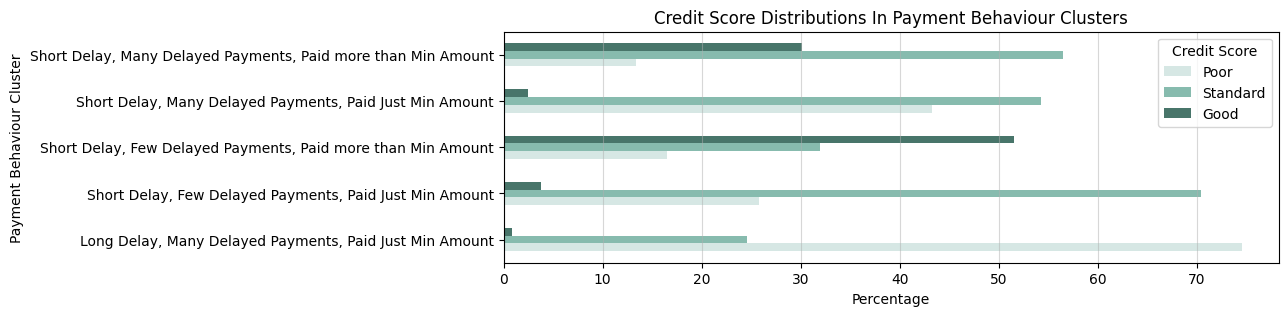

In [83]:
clusterScoreDistribution = pd.crosstab(dataClusters['payment_behaviour_cluster'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distributions In Payment Behaviour Clusters')
plt.xlabel('Percentage')
plt.ylabel('Payment Behaviour Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(axis='x', alpha=0.5) 
plt.show()

Displaying the distribution of credit scores in each cluster using a heatmap

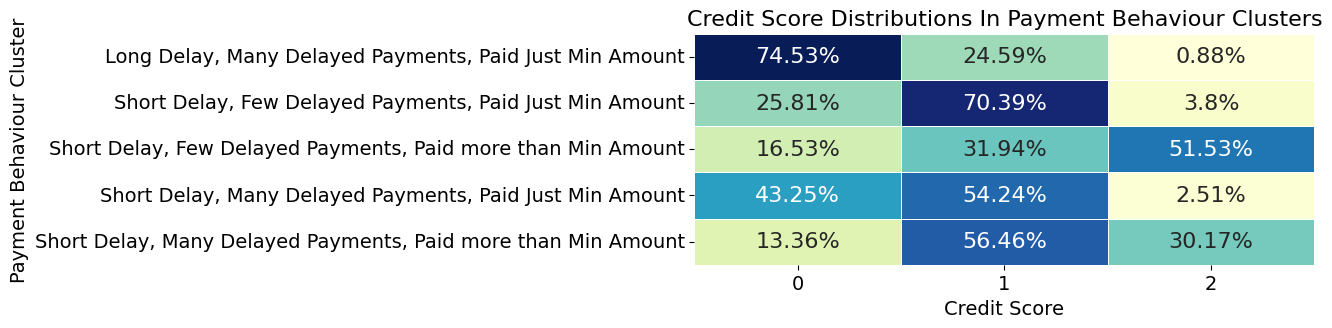

In [84]:
clusterScoreDistribution = clusterScoreDistribution.round(2)
annotations = clusterScoreDistribution.applymap(lambda x: f"{x}%")

plt.figure(figsize=(8, 3))
sns.heatmap(clusterScoreDistribution, annot=annotations, cmap='YlGnBu', cbar=False, fmt='', linewidths=.5, annot_kws={"size": 16})

plt.title('Credit Score Distributions In Payment Behaviour Clusters', fontsize=16)
plt.ylabel('Payment Behaviour Cluster', fontsize=14)
plt.xlabel('Credit Score', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.savefig('graphs/paymentBehaviourResults.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()


Logistic Regression to predict credit score using payment behaviour varialbes to quantify their impact.

In [85]:
x = customerData[['delay_from_due_date', 'num_of_delayed_payment', 'paymentMinAmountNum']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [87]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [88]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 63.15%


In [89]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficients_df = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

print(coefficients_df)

                        Credit Score 0  Credit Score 1  Credit Score 2
delay_from_due_date           0.688864       -0.018321       -0.670543
num_of_delayed_payment        0.119488        0.079481       -0.198969
paymentMinAmountNum           0.448782        0.345197       -0.793979


Third Research Question: To what extent do demographic factors such as age and income influence an individual’s credit score?

Analyzing the distribution of age and annual income using boxplots and histograms

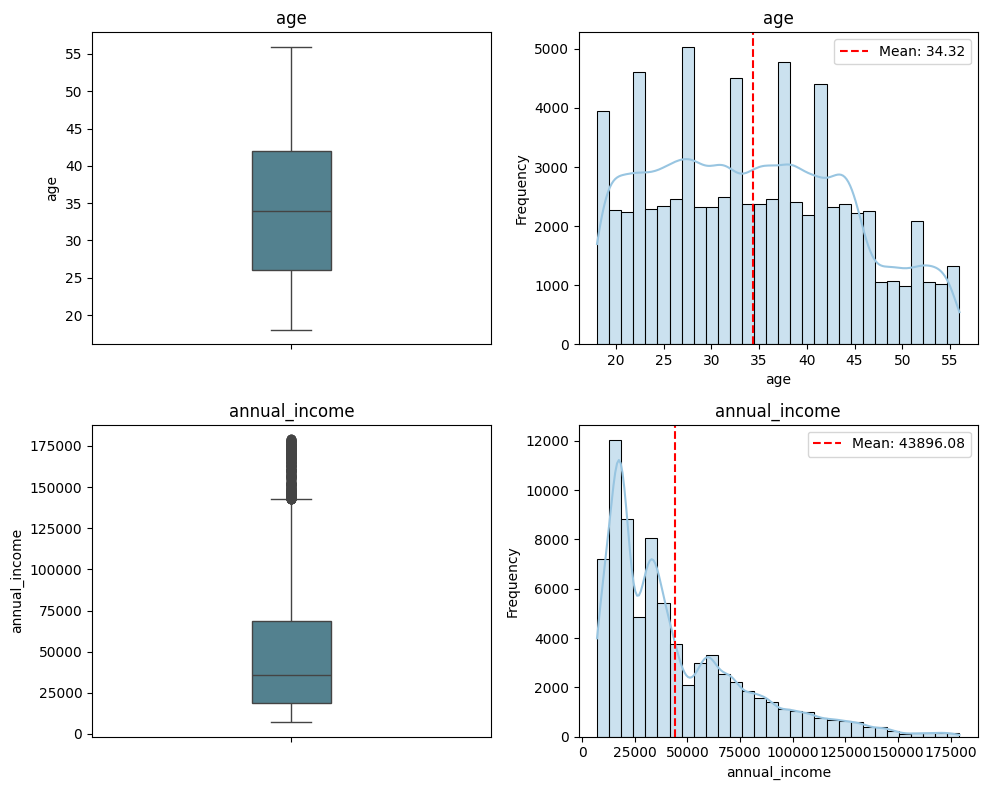

In [90]:
demographicFactorsColumns = ['age', 'annual_income']

numPlots = len(demographicFactorsColumns)
rows = 2
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 4))
axes = axes.flatten()

for i, col in enumerate(demographicFactorsColumns):
    sns.boxplot(data=customerData, y=col, ax=axes[2 * i], color="#498699",  width=0.2)
    axes[2 * i].set_title(col)
    axes[2 * i].set_ylabel(col)

    sns.histplot(data=data, x=col, ax=axes[2 * i + 1], color="#98c5e1", kde=True, bins=30)
    mean_value = data[col].mean()
    axes[2 * i + 1].axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    axes[2 * i + 1].legend()

    axes[2 * i + 1].set_title(col)
    axes[2 * i + 1].set_xlabel(col)
    axes[2 * i + 1].set_ylabel('Frequency')

for j in range(2 * numPlots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Comparing the distributions of age and annual income in each credit score class using boxplots. This is included in the report

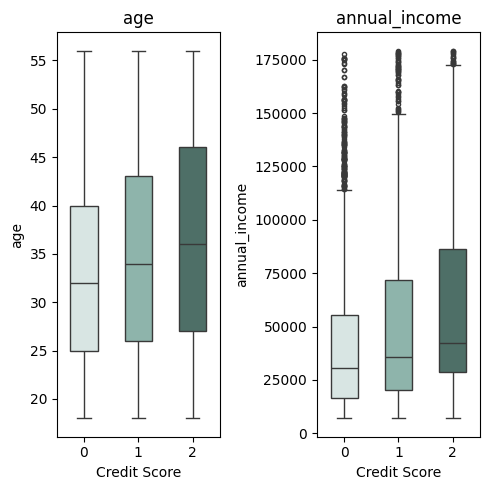

In [91]:
customPalette = {0: "#d6e7e4", 1: "#87bbae", 2: "#48756a"}
flierprops = dict(markersize=3)

fig, axes = plt.subplots(1, 2, figsize=(5, 5))
axes = axes.flatten()

for i, col in enumerate(demographicFactorsColumns):
    sns.boxplot(data=customerData, x='credit_score', y=col, ax=axes[i], hue='credit_score', palette=customPalette, width=0.5, legend=False, flierprops=flierprops)
    axes[i].set_title(col)
    axes[i].set_xlabel('Credit Score')
    axes[i].set_ylabel(col)

for j in range(numPlots, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('graphs/demographicFactors(EDA).png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Anova test to check if there is significance difference between the demographic factors attributes of customers belonging to different credit scores. Followed by eta squared to check effect size. This is included in the report

In [92]:
results = {}
scores =[0, 1, 2]

for column in demographicFactorsColumns:
    groupData = []
    for score in scores:
        columnData = customerData[customerData['credit_score'] == score][column].tolist()
        groupData.append(columnData)
        
    f_stat, p_value = f_oneway(groupData[0], groupData[1], groupData[2])
    results[column] = {'F-statistic': f_stat, 'p-value': p_value}

    if (p_value <= 0.05):
        etaSquared = correlation_ratio(customerData['credit_score'], customerData[column])
        results[column]['etaSquared'] = etaSquared


resultsDF = pd.DataFrame(results).T
resultsDF.sort_values('etaSquared', ascending=False, inplace=True)

resultsDF

F-statistic       p-value  etaSquared
annual_income   220.062583  2.179611e-94    0.039448
age              98.551351  3.877172e-43    0.018059

Customer Segmentation based on Demographic Factors using K Mean Clustering

Clustering using both demographic factors: age and annual income

Using Silhoutte Score to find ideal number of clusters. This code for Silhoutte analysis is influenced by (Scikit-Learn, 2024). Full reference is mentioned at the end of this notebook.

Number of Clusters: 2, Silhouette Score: 0.3629
Number of Clusters: 3, Silhouette Score: 0.4190
Number of Clusters: 4, Silhouette Score: 0.3617
Number of Clusters: 5, Silhouette Score: 0.3673
Number of Clusters: 6, Silhouette Score: 0.3768


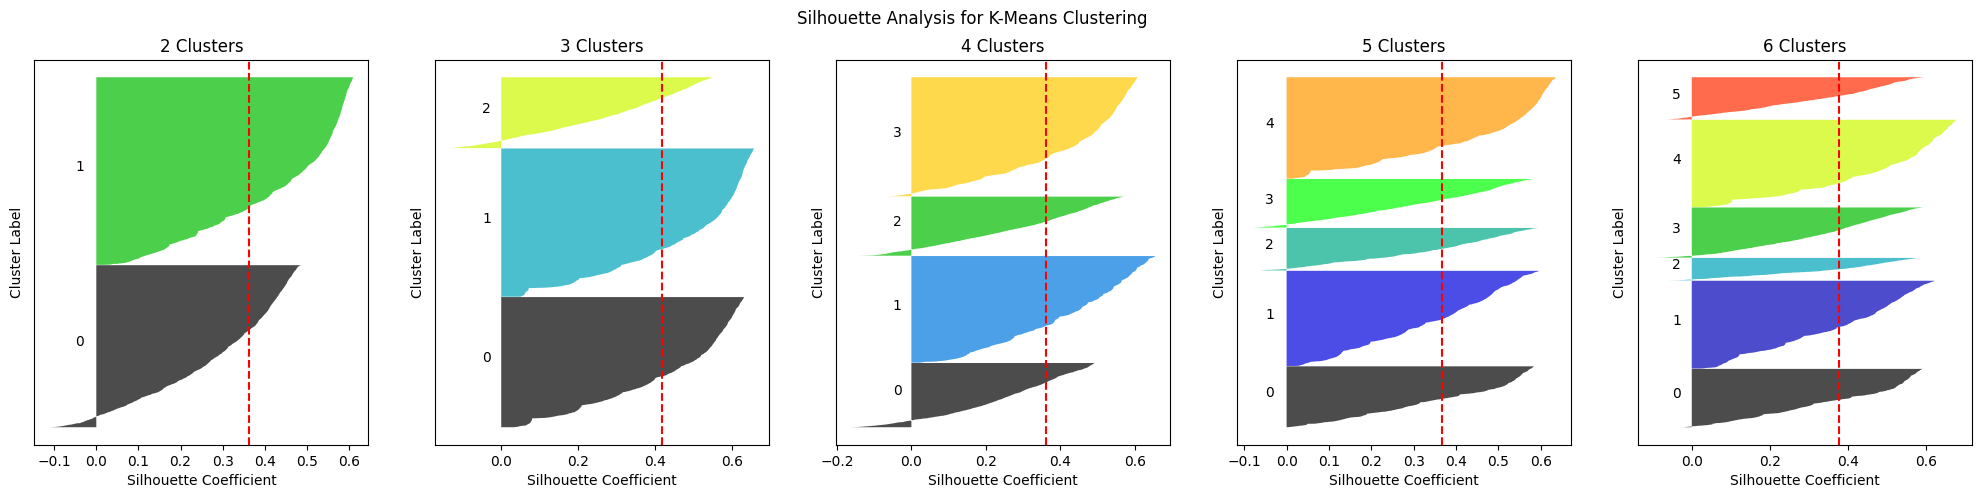

In [93]:
features = ['age', 'annual_income']
scaler = StandardScaler()
demographicFactorsScaled = scaler.fit_transform(customerData[features])

clusterRange = [2,3,4,5,6]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering")

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(demographicFactorsScaled)
    silhouetteAvg = silhouette_score(demographicFactorsScaled, clusterLabels)
    silhouetteValues = silhouette_samples(demographicFactorsScaled, clusterLabels)
    print(f"Number of Clusters: {nClusters}, Silhouette Score: {silhouetteAvg:.4f}")
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.show()

3 clusters is selected since it has the highest silhoutte score and reasonable silhoutte plot thickness

Clustering using age and annual income. This is included in the report

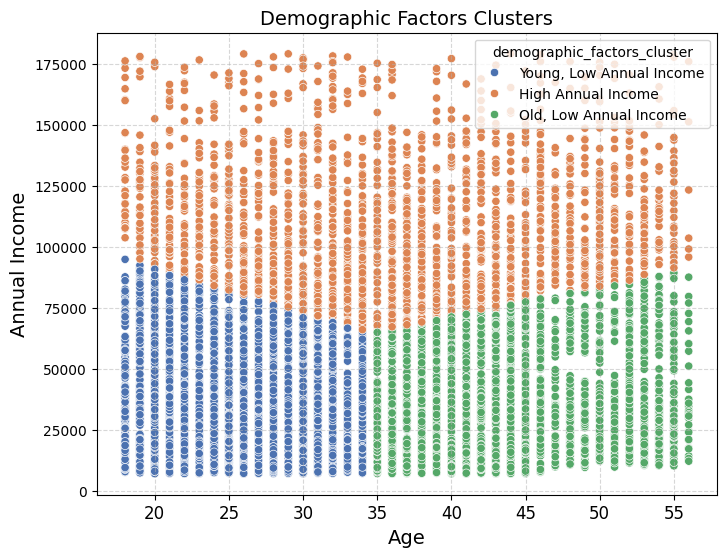

In [94]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
dataClusters['demographic_factors_cluster'] = kmeans.fit_predict(demographicFactorsScaled)
customLabels = {
    0: "Old, Low Annual Income",
    1: "Young, Low Annual Income",
    2: "High Annual Income"
}
dataClusters['demographic_factors_cluster'] = dataClusters['demographic_factors_cluster'].map(customLabels)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataClusters['age'], y=dataClusters['annual_income'], hue=dataClusters['demographic_factors_cluster'], palette='deep')
plt.title('Demographic Factors Clusters', fontsize = 14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Income', fontsize=14)
plt.xticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.grid(True, linestyle='--', alpha=0.5) 
plt.savefig('graphs/demographicFactorsClusters.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Analyzing the distribution of credit scores in each cluster using a bar graph

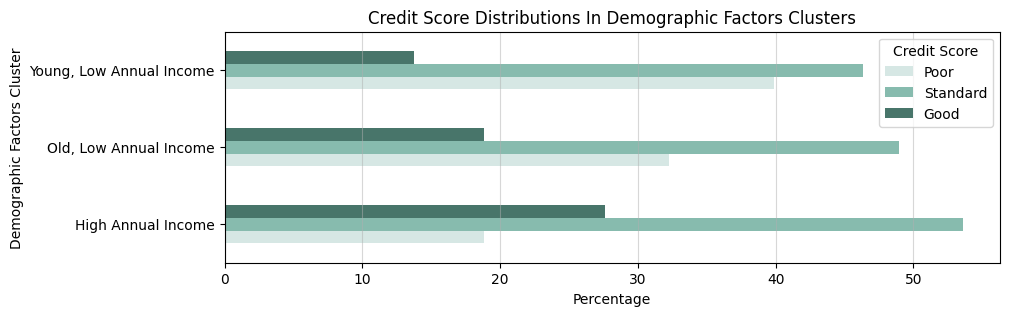

In [95]:
clusterScoreDistribution = pd.crosstab(dataClusters['demographic_factors_cluster'], dataClusters['credit_score'], normalize='index') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distributions In Demographic Factors Clusters')
plt.xlabel('Percentage')
plt.ylabel('Demographic Factors Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(axis='x', alpha=0.5) 
plt.show()

Analyzing the distribution of credit scores in each cluster using a heatmap. This is included in the report

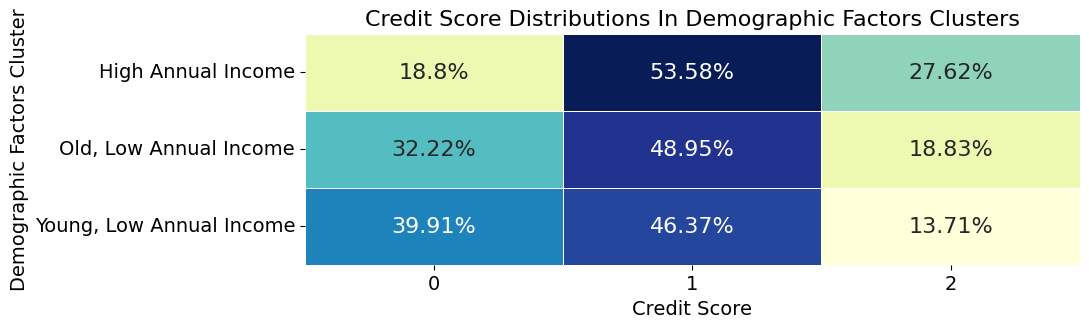

In [96]:
clusterScoreDistribution = clusterScoreDistribution.round(2)
annotations = clusterScoreDistribution.applymap(lambda x: f"{x}%")

plt.figure(figsize=(10, 3))
sns.heatmap(clusterScoreDistribution, annot=annotations, cmap='YlGnBu', cbar=False, fmt='', linewidths=.5, annot_kws={"size": 16})

plt.title('Credit Score Distributions In Demographic Factors Clusters', fontsize=16)
plt.ylabel('Demographic Factors Cluster', fontsize=14)
plt.xlabel('Credit Score', fontsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
plt.savefig('graphs/demographicFactorsResults.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Logistic Regression to predict credit score using demographics factors to quantify their impact.

In [97]:
x = customerData[['age', 'annual_income']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [98]:
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

In [99]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [100]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 49.35%


In [101]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficients_df = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

print(coefficients_df)

               Credit Score 0  Credit Score 1  Credit Score 2
age                 -0.185097        0.002644        0.182454
annual_income       -0.284361        0.028903        0.255458


Feature Engineering using PCA on debt management variables to combine them into one component

In [102]:
scaler = StandardScaler()
debtManagementScaled = scaler.fit_transform(customerData[['outstanding_debt', 'num_of_loan', 'num_credit_card']])

pca = PCA(n_components=1)
debtManagementComponent = pca.fit_transform(debtManagementScaled)
customerData['debtManagementComponent'] = debtManagementComponent
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"PCA Loadings: {pca.components_}")
customerData.head()


Explained Variance Ratio: [0.67607054]
PCA Loadings: [[0.6130833  0.59114397 0.524097  ]]


customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009            202.68            4                5   
1  CUS_0x100b           1030.20            0                4   
2  CUS_0x1011            473.14            3                3   
3  CUS_0x1013           1233.51            3                3   
4  CUS_0x1015            340.22            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  
0          52313             1                -0.630880  
1         113781             0                -1.426836  
2          58918             1                -1.244495  
3          98621             1                -0.836216  
4          46951             2                -1.797320

Feature Engineering using PCA on payment behaviour variables to combine them into one component

In [103]:
scaler = StandardScaler()
paymentBehaviourScaled = scaler.fit_transform(customerData[['delay_from_due_date', 'num_of_delayed_payment', 'paymentMinAmountNum']])

pca = PCA(n_components=1)
paymentBehaviourComponent = pca.fit_transform(paymentBehaviourScaled)
customerData['paymentBehaviourComponent'] = paymentBehaviourComponent
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"PCA Loadings: {pca.components_}")
customerData.head()

Explained Variance Ratio: [0.69227479]
PCA Loadings: [[0.56370799 0.59153227 0.57647452]]


customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009            202.68            4                5   
1  CUS_0x100b           1030.20            0                4   
2  CUS_0x1011            473.14            3                3   
3  CUS_0x1013           1233.51            3                3   
4  CUS_0x1015            340.22            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  \
0          52313             1                -0.630880   
1         113781             0                -1.426836   
2          58918             1                -1.244495   
3          98621             1                -0.836216   
4          46951             2                -1.797320   

   paymentBehaviourComponent  
0                   0.383535  
1                  -1.630098  
2                   0.768357  
3                  -1.434964  
4                  -0.455812

Feature Engineering using PCA on demographic factors to combine them into one component

In [104]:
scaler = StandardScaler()
demographicFactorsScaled = scaler.fit_transform(customerData[['age', 'annual_income']])

pca = PCA(n_components=1)
demographicFactorsComponent = pca.fit_transform(demographicFactorsScaled)
customerData['demographicFactorsComponent'] = demographicFactorsComponent
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"PCA Loadings: {pca.components_}")
customerData.head()

Explained Variance Ratio: [0.53652232]
PCA Loadings: [[0.70710678 0.70710678]]


customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009            202.68            4                5   
1  CUS_0x100b           1030.20            0                4   
2  CUS_0x1011            473.14            3                3   
3  CUS_0x1013           1233.51            3                3   
4  CUS_0x1015            340.22            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  \
0          52313             1                -0.630880   
1         113781             0                -1.426836   
2          58918             1                -1.244495   
3          98621             1                -0.836216   
4          46951             2                -1.797320   

   paymentBehaviourComponent  demographicFactorsComponent  
0                   0.383535                    -0.518124  
1                  -1.630098                     0.166794  
2                   0.768357                     0.880957  
3                  -1.434964                     1.642945  
4                  -0.455812                    -0.550348

Since the explained variance ratio is low for demographic factors component, feature engineering is also done using weighted sum of age and annual income

In [105]:
customerData['demographicFactorsComponent'] = (
    0.5 * demographicFactorsScaled[:, 0] + 
    0.5 * demographicFactorsScaled[:, 1]
)

customerData.head()

customer_id  outstanding_debt  num_of_loan  num_credit_card  \
0  CUS_0x1009            202.68            4                5   
1  CUS_0x100b           1030.20            0                4   
2  CUS_0x1011            473.14            3                3   
3  CUS_0x1013           1233.51            3                3   
4  CUS_0x1015            340.22            0                4   

   delay_from_due_date  num_of_delayed_payment  paymentMinAmountNum  age  \
0                    7                      18                    1   26   
1                   13                       7                    0   19   
2                   27                      14                    1   44   
3                   13                       9                    0   44   
4                    8                       9                    1   27   

   annual_income  credit_score  debtManagementComponent  \
0          52313             1                -0.630880   
1         113781             0                -1.426836   
2          58918             1                -1.244495   
3          98621             1                -0.836216   
4          46951             2                -1.797320   

   paymentBehaviourComponent  demographicFactorsComponent  
0                   0.383535                    -0.366369  
1                  -1.630098                     0.117941  
2                   0.768357                     0.622931  
3                  -1.434964                     1.161738  
4                  -0.455812                    -0.389155

K Mean Clustering for Customer Segmentation using feature engineered debt management component, payment behaviour component and demographic factors component

Using Silhoutte Score to find the ideal number of clusters. This code for Silhoutte analysis is influenced by (Scikit-Learn, 2024). Full reference is mentioned at the end of this notebook.

Number of Clusters: 2, Silhouette Score: 0.4745
Number of Clusters: 3, Silhouette Score: 0.3905
Number of Clusters: 4, Silhouette Score: 0.3220
Number of Clusters: 5, Silhouette Score: 0.2930
Number of Clusters: 6, Silhouette Score: 0.2705


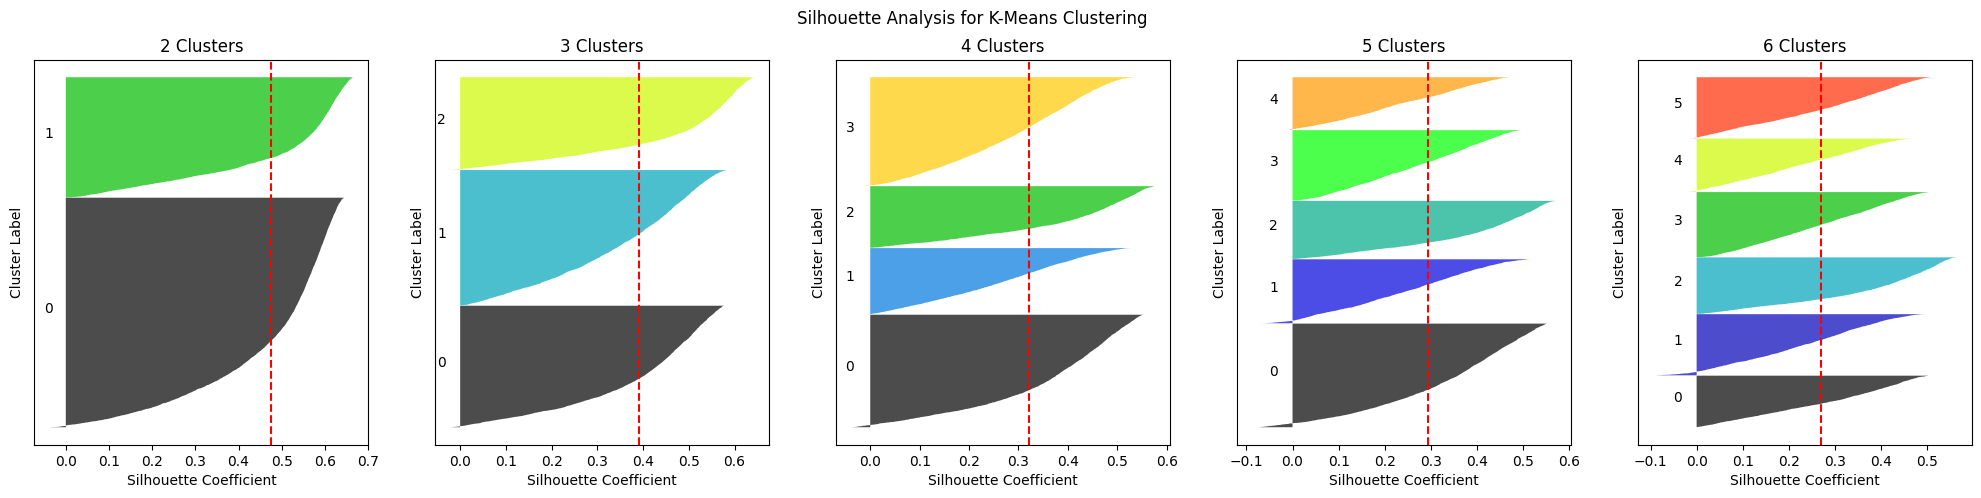

In [106]:
features = customerData[['debtManagementComponent', 'paymentBehaviourComponent', 'demographicFactorsComponent']]

clusterRange = [2,3,4,5,6]
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle("Silhouette Analysis for K-Means Clustering")

for i, nClusters in enumerate(clusterRange):
    ax = axes[i]
    kmeans = KMeans(n_clusters=nClusters, random_state=42, n_init='auto')
    clusterLabels = kmeans.fit_predict(features)
    silhouetteAvg = silhouette_score(features, clusterLabels)
    silhouetteValues = silhouette_samples(features, clusterLabels)
    print(f"Number of Clusters: {nClusters}, Silhouette Score: {silhouetteAvg:.4f}")
    y_lower = 10
    for i in range(nClusters):
        ithClusterSilhouetteValues = silhouetteValues[clusterLabels == i]
        ithClusterSilhouetteValues.sort()
        size_cluster_i = ithClusterSilhouetteValues.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / nClusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ithClusterSilhouetteValues, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{nClusters} Clusters")
    ax.axvline(x=silhouetteAvg, color="red", linestyle="--")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.set_yticks([])

plt.show()



3 clusters is selected over 2 clusters because in 2 clusters, the silhotte plot for cluster 0 is too thick

Clustering using the debt management component, payment behaviour component and demographic factors component. This is included in the report. The code for 3d scatterplots has been influenced by (GeeksforGeeks, 2020) and (Matplotlib, 2014). Complete citations at the end of the notebook

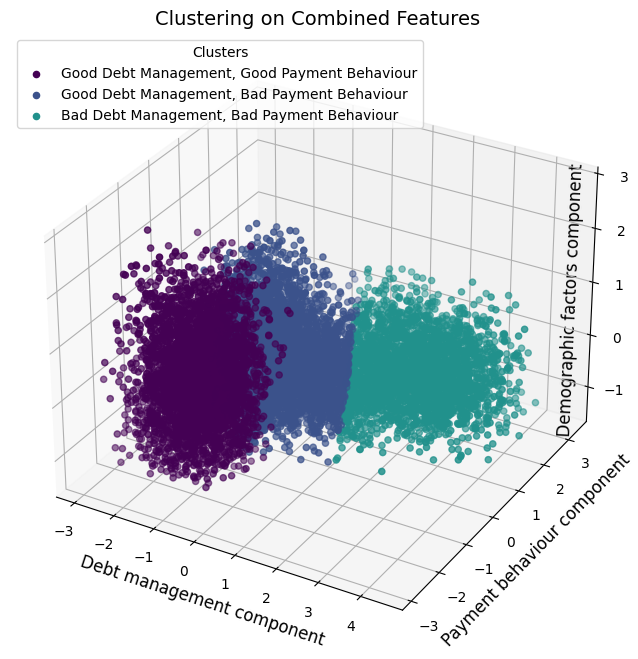

In [107]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
dataClusters = customerData.copy()
dataClusters['combined_cluster'] = kmeans.fit_predict(features)
customLabels = {
    0: "Good Debt Management, Good Payment Behaviour",
    1: "Good Debt Management, Bad Payment Behaviour",
    2: "Bad Debt Management, Bad Payment Behaviour"
}
dataClusters['combined_cluster'] = dataClusters['combined_cluster'].map(customLabels)

colours = cm.viridis(np.linspace(0, 1, 5))
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

for cluster in range(3):
    clusterData = dataClusters[dataClusters['combined_cluster'] == customLabels[cluster]]
    ax.scatter(
        clusterData['debtManagementComponent'], 
        clusterData['paymentBehaviourComponent'], 
        clusterData['demographicFactorsComponent'], 
        color=colours[cluster], 
        label=customLabels[cluster], 
        s=20
    )

ax.set_title('Clustering on Combined Features', fontsize=14)
ax.set_xlabel('Debt management component', fontsize=12)
ax.set_ylabel('Payment behaviour component', fontsize=12)
ax.set_zlabel('Demographic factors component', fontsize=12, labelpad=-30)
ax.legend(title='Clusters', loc='upper left', fontsize=10)
plt.savefig('graphs/combinedClusters.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Analyzing the distribution of credit scores in each cluster using a bar graph

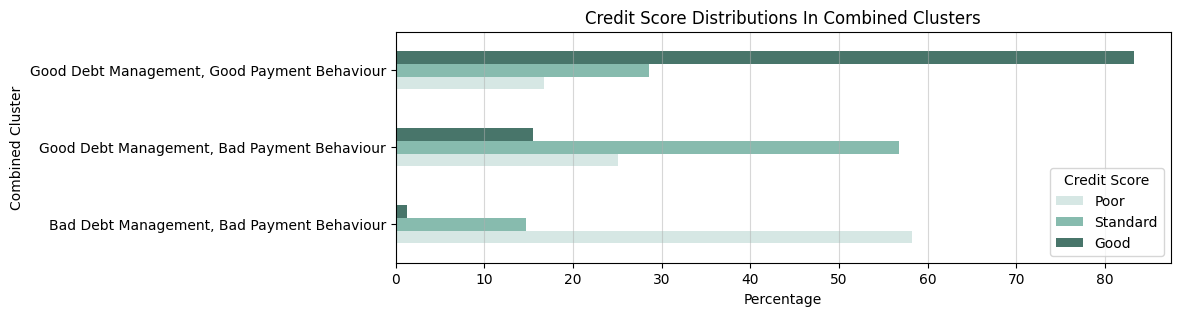

In [108]:
clusterScoreDistribution = pd.crosstab(dataClusters['combined_cluster'], dataClusters['credit_score'], normalize='columns') * 100

clusterScoreDistribution.plot(kind='barh', color=['#d6e7e4', '#87bbae', '#48756a'], figsize=(10, 3))
plt.title('Credit Score Distributions In Combined Clusters')
plt.xlabel('Percentage')
plt.ylabel('Combined Cluster')
plt.legend(title='Credit Score', labels=['Poor', 'Standard', 'Good'])
plt.grid(axis='x', alpha=0.5) 
plt.show()

Analyzing the distribution of credit scores in each cluster using a heatmap. This is included in the report

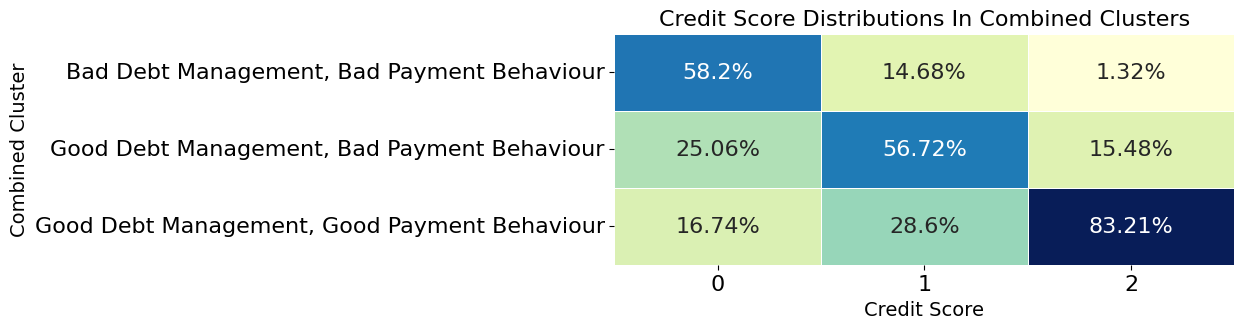

In [109]:
clusterScoreDistribution = clusterScoreDistribution.round(2)
annotations = clusterScoreDistribution.applymap(lambda x: f"{x}%")

plt.figure(figsize=(8, 3))
sns.heatmap(clusterScoreDistribution, annot=annotations, cmap='YlGnBu', cbar=False, fmt='', linewidths=.5, annot_kws={"size": 16})

plt.title('Credit Score Distributions In Combined Clusters', fontsize=16)
plt.ylabel('Combined Cluster', fontsize=14)
plt.xlabel('Credit Score', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('graphs/combinedResults.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Logistic Regression across featured engineered debt management, payment behaviour and demographic factors to quantify their impact

In [110]:
x = customerData[['debtManagementComponent', 'paymentBehaviourComponent', 'demographicFactorsComponent']]
y = customerData['credit_score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
model = LogisticRegression(multi_class='multinomial')
result = model.fit(xTrain, yTrain)

In [112]:
yPred = model.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 66.65%


Comparing the coefficients of each component. This is included in the report

In [113]:
classNames = [f"Credit Score {className}" for className in model.classes_]

coefficientsDF = pd.DataFrame(
    model.coef_.T, 
    index=x.columns, 
    columns= classNames)

coefficientsDF

Credit Score 0  Credit Score 1  Credit Score 2
debtManagementComponent            0.483378       -0.084296       -0.399082
paymentBehaviourComponent          0.410210        0.327788       -0.737998
demographicFactorsComponent       -0.015355        0.047711       -0.032357

Converting the log odds to odd ratios for interpretability. This is inlcuded in the report

In [114]:
oddsRatios = np.exp(coefficientsDF)
oddsRatios.columns = pd.MultiIndex.from_product([["Odds Ratios"], coefficientsDF.columns])
oddsRatios

Odds Ratios                              
                            Credit Score 0 Credit Score 1 Credit Score 2
debtManagementComponent           1.621543       0.919159       0.670936
paymentBehaviourComponent         1.507135       1.387894       0.478070
demographicFactorsComponent       0.984763       1.048868       0.968161

References

1. Bobbitt, Z. (2020) What is Eta Squared? (definition & example), Statology. Available at: https://www.statology.org/eta-squared/ (Accessed: 21 December 2024). 
2. Kiryl (2021) How to compute correlation ratio or ETA in python?, Stack Overflow. Available at: https://stackoverflow.com/questions/52083501/how-to-compute-correlation-ratio-or-eta-in-python (Accessed: 21 December 2024). 
3. Cramér’s V (2024) IBM. Available at: https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v (Accessed: 21 December 2024). 
4. Eunicien, Z. and Lee, J. (2021) Using pandas, calculate Cramér’s coefficient matrix, Stack Overflow. Available at: https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix (Accessed: 21 December 2024). 
5. Demyanyk, Y. (2010) Your credit score is a ranking, not a score, Economic Commentary. Federal Reserve Bank of Cleveland. Available at: https://www.clevelandfed.org/en/newsroom-and-events/publications/economic-commentary/economic-commentary-archives/2010-economic-commentaries/ec-201016-your-credit-score-is-a-ranking-not-a-score.aspx (Accessed: 20 December 2024). 
6. Hayashi, F. and Stavins, J. (2012) ‘Effects of credit scores on Consumer Payment Choice’, SSRN Electronic Journal. doi: 10.2139/ssrn.2042711
7. Selecting the number of clusters with silhouette analysis on kmeans clustering (n.d.) scikit. Available at: https://scikit-learn.org/1.5/auto_examples/cluster/plot_kmeans_silhouette_analysis.html (Accessed: 21 December 2024). 
8. GeeksforGeeks (2020) 3D scatter plotting in python using Matplotlib, GeeksforGeeks. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/ (Accessed: 21 December 2024). 
9. Matplotlib (n.d.) 3D scatterplot, 3D scatterplot - Matplotlib 3.10.0 documentation. Available at: https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html (Accessed: 21 December 2024). 